In [ ]:
def ReadTxtName(rootdir):                        ##FASTA Reader
    lines = []
    with open(rootdir, 'r') as file_to_read:
        while True:
            line = file_to_read.readline()
            if not line:
                break
            line = line.strip('\n')
            lines.append(line)
    return lines

In [ ]:
Z_descriptor = {
    'A': (0.07, -1.73, 0.09),
    'V': (-2.69, -2.53, -1.29),
    'L': (-4.19, - 1.03, -0.98),
    'I': (-4.44, -1.68, -1.03),
    'P': (-1.22, 0.88, 2.23),
    'F': (-4.92, 1.30, 0.45),
    'W': (-4.75, 3.65, 0.85),
    'M': (-2.49, -0.27, -0.41),
    'K': (2.84, 1.41, -3.14),
    "R": ( 2.88, 2.52, -3.44),
    "H": ( 2.41, 1.74,  1.11),
    "G": ( 2.23,-5.36,  0.30),
    "S": ( 1.96,-1.63,  0.57),
    "T": ( 0.92,-2.09, -1.40),
    "C": ( 0.71,-0.97,  4.13),
    "Y": (-1.39, 2.32,  0.01),
    "N": ( 3.22, 1.45,  0.84),
    "Q": ( 2.18, 0.53, -1.14),
    "D": ( 3.64, 1.13,  2.36),
    "E": ( 3.08, 0.39, -0.07),
    "X": ( 0.00, 0.00, 0.00),
    "Z": ( 0.00, 0.00, 0.00)
}
# Z_descriptor = list(Z_descriptor.keys())
# Z_descriptor = { Z_descriptor[i]: [i] for i in range(len(Z_descriptor))  }
def Z(antigen):
    return list(Z_descriptor[antigen.upper()])

def unZ(descriptor):
    epit = ""
    for i in descriptor:
        epit += "".join([ag for ag, z in Z_descriptor.items() if list(z) == list(i)])
    return epit


def encode (dataset):
    dataset_length = len(dataset)
    new_dataset = []
    for i in range(dataset_length):
        seq = dataset[i].upper()
        try:
            description = [ Z(prot) for prot in seq ]
            new_dataset += [ description ]
        except:
            print(seq)
    return new_dataset

In [ ]:
def ACC (dataset):

    ACCN = [0] * len(dataset)
    for i in range (len(ACCN)):
        ACCN[i] = [0] * 46 ## 45 variables for ACC and 1 for whether it's BPAs

    for i in range (len(dataset)):
        description = [0] * len(dataset[i])
        for k in range(len(dataset[i])):
            description[k] = Z(dataset[i][k])


        ##l=1
        ##Calculate AJJ:
        l   = 1
        n   = len(dataset[i])
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][0] / (n-l))
        ACCN[i][0] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][1] / (n-l))
        ACCN[i][1] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][2] / (n-l))
        ACCN[i][2] = cal

        ##Calculate CJK:
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][1] / (n-l))
        ACCN[i][3] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][2] / (n-l))
        ACCN[i][4] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][0] / (n-l))
        ACCN[i][5] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][2] / (n-l))
        ACCN[i][6] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][0] / (n-l))
        ACCN[i][7] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][1] / (n-l))
        ACCN[i][8] = cal

        ##l=2
        ##Calculate AJJ:
        l   = 2
        n   = len(dataset[i])
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][0] / (n-l))
        ACCN[i][9] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][1] / (n-l))
        ACCN[i][10] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][2] / (n-l))
        ACCN[i][11] = cal

        ##Calculate CJK:
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][1] / (n-l))
        ACCN[i][12] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][2] / (n-l))
        ACCN[i][13] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][0] / (n-l))
        ACCN[i][14] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][2] / (n-l))
        ACCN[i][15] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][0] / (n-l))
        ACCN[i][16] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][1] / (n-l))
        ACCN[i][17] = cal

        ##l=3
        ##Calculate AJJ:
        l   = 3
        n   = len(dataset[i])
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][0] / (n-l))
        ACCN[i][18] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][1] / (n-l))
        ACCN[i][19] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][2] / (n-l))
        ACCN[i][20] = cal

        ##Calculate CJK:
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][1] / (n-l))
        ACCN[i][21] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][2] / (n-l))
        ACCN[i][22] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][0] / (n-l))
        ACCN[i][23] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][2] / (n-l))
        ACCN[i][24] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][0] / (n-l))
        ACCN[i][25] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][1] / (n-l))
        ACCN[i][26] = cal

        ##l=4
        ##Calculate AJJ:
        l   = 4
        n   = len(dataset[i])
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][0] / (n-l))
        ACCN[i][27] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][1] / (n-l))
        ACCN[i][28] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][2] / (n-l))
        ACCN[i][29] = cal

        ##Calculate CJK:
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][1] / (n-l))
        ACCN[i][30] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][2] / (n-l))
        ACCN[i][31] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][0] / (n-l))
        ACCN[i][32] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][2] / (n-l))
        ACCN[i][33] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][0] / (n-l))
        ACCN[i][34] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][1] / (n-l))
        ACCN[i][35] = cal

        ##l=5
        ##Calculate AJJ:
        l   = 5
        n   = len(dataset[i])
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][0] / (n-l))
        ACCN[i][36] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][1] / (n-l))
        ACCN[i][37] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][2] / (n-l))
        ACCN[i][38] = cal

        ##Calculate CJK:
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][1] / (n-l))
        ACCN[i][39] = cal
        cal = 0
        for j in range (n-l):
            cal = cal + (description[j][0] * description[j+1][2] / (n-l))
        ACCN[i][40] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][0] / (n-l))
        ACCN[i][41] = cal
        for j in range (n-l):
            cal = cal + (description[j][1] * description[j+1][2] / (n-l))
        ACCN[i][42] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][0] / (n-l))
        ACCN[i][43] = cal
        for j in range (n-l):
            cal = cal + (description[j][2] * description[j+1][1] / (n-l))
        ACCN[i][44] = cal

    return ACCN

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
# the selected features are named as use columns in dataframe

df2 = pd.read_csv('COMBO_2.csv')
#dataframe = ReadTxtName(r'./COMBO_1.csv')
df2.head()
X = df2.drop(['CLASS'], axis=1) # Get the name of the second column (index 1)
df3=X
#Drop the target column from features
y = df2['CLASS']
#y.shape

In [ ]:
df2.shape

In [ ]:
from keras.utils import pad_sequences
lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
lab_1 = pad_sequences(lab, padding='post', value=0, dtype='float32') # Pad sequences
lab_2 = np.array(lab_1)
# Reshape the lab array
X = lab_1.reshape(lab_1.shape[0], -1)
#or


In [ ]:
lab_2.shape

lab_2[0:10]

In [ ]:
!pip install scikeras

In [ ]:
all_indices = list(range(lab_1.shape[0])) # Use the first dimension of the dataset for indices
#df2.drop(['SEQ'] ,axis=1, inplace=True)
#all_indices = list(range(df2.shape[0]))
train_ind, test_ind = train_test_split(all_indices, test_size=0.2,shuffle=True)
X_train = X[train_ind]
X_test = X[test_ind]
y_train = y[train_ind]
y_test = y[test_ind]
# Correctly index the dataset along the first axis
#X_train = X.iloc[train_ind]
#X_train = X[train_ind, :, :]  # Select samples using train_ind along the first axis
#X_test = X.iloc[test_ind] #Use iloc to select rows from X using test_ind
y_train = y.iloc[train_ind] #Use iloc to select rows from y using train_ind
y_test = y.iloc[test_ind] #Use iloc to select rows from y using test_ind

In [ ]:

X_test[1:100]


In [ ]:
print(X_train)

In [ ]:
## Pro-I-Gen model Bi-Directional LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional, LSTM, Input
from tensorflow.keras.regularizers import l2

timesteps = 1  # Example: If each sample is a single timestep
#features = 14772
features = X_train.shape[1]

X_train_reshape = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_reshape = X_test.reshape(X_test.shape[0], timesteps, features) #

bi_lstm = Bidirectional(LSTM(units=20,kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01),
                              return_sequences=True),input_shape=(timesteps, features))
d_1 = tf.keras.layers.Dense(32, activation='relu')
d_2 = tf.keras.layers.Dense(16, activation='relu')
d_3 = tf.keras.layers.Dropout(0.5)
d_4 = tf.keras.layers.Dense(4, activation='sigmoid')
d_5 = tf.keras.layers.Dense(1, activation='sigmoid')



input_layer = Input(shape=(timesteps, features)) # input_shape should be (timesteps, features)
x = bi_lstm(input_layer)
x = bi_lstm(input_layer)
x = d_1(x)
x = d_2(x)
x = d_3(x)
x = d_4(x)
output_layer = d_5(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
# this one with dropout
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4769 - loss: 3.7755 - val_accuracy: 0.4852 - val_loss: 3.7193
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step - accuracy: 0.4769 - loss: 3.7304 - val_accuracy: 0.4852 - val_loss: 3.6746
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.4769 - loss: 3.6853 - val_accuracy: 0.4852 - val_loss: 3.6304
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step - accuracy: 0.4769 - loss: 3.6414 - val_accuracy: 0.4852 - val_loss: 3.5867
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.4769 - loss: 3.5975 - val_accuracy: 0.4852 - val_loss: 3.5435
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.4769 - loss: 3.5543 - val_accuracy: 0.4852 - val_loss: 3.5009
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.4769 - loss: 3.5113 - val_accuracy: 0.4852 - val_loss: 3.4587
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step - accuracy: 0.4769 - loss: 3.4696 - val_accuracy: 0.4852 - val_

In [ ]:
grid_search_result.best_score_

In [ ]:
##this one
print("Nested CV Score: ", nested_score.mean())


In [ ]:
import pandas as pd

all_scores = {
    "Not nested CV": grid_search_result.best_score_,
    "Nested CV": nested_score.mean(),  # Call mean() to get the actual mean value
}
all_scores = pd.DataFrame(all_scores, index=[0]) # Pass index=[0] to create a DataFrame with a single row
import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
all_scores.plot.box(color=color, vert=False)
plt.xlabel("Accuracy")
_ = plt.title(
    "Comparison of mean accuracy obtained on the test sets with\n"
    "and without nested cross-validation"
)

In [ ]:
print("Nested CV Score: ", nested_score.mean())

In [ ]:
##this
best_params=grid_search_result.best_params_
accuracybest_params=grid_search_result.best_params_
accuracy=grid_search_result.best_score_
print(best_params)

print(best_params)
print(accuracy)

In [ ]:
model.get_params().keys()

In [ ]:
print("Nested CV Score: ", nested_score.mean())

In [ ]:
print("Nested CV Score: ", nested_score.mean()) # take this

In [ ]:
# take this
best_params=grid_search_result.best_params_
accuracy=grid_search_result.best_score_
print(best_params)
print(accuracy)

In [ ]:
Standard Deviation of Cross Validation Accuracy:\n{"-"*25}\n{np.std(lc["nested_score"])}\n\n\

In [ ]:
num_neurons = get_total_number_of_neurons(model= model, include_output_layer= False)

In [ ]:
test_score_not_nested = []
test_score_nested = []
# nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)
param_grid={'model__activation': ['relu', 'sigmoid', 'tanh'],
            'model__hidden_layers': [4, 6, 10],
            'model__optimizer': ['adam', 'sgd', 'rmsprop']}

grid_search_result = grid_search.fit(X_train, y_train, shuffle= True)

# Compile the best model

nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv, n_jobs=2)
nested_score.append(nested_score.mean())
test_score_not_nested.append(model.best_score_)
nested_score.append(nested_score.mean())
    # Nested CV with parameter optimization


In [ ]:
!pip install tensorflow scikit-learn

In [ ]:

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold # Import accur




test_score_not_nested = []
test_score_nested = []

N_TRIALS = 20
for i in range(N_TRIALS):
    # For each trial, we use cross-validation splits on independently
    # randomly shuffled data by passing distinct values to the random_state
    # parameter.
    inner_cv = KFold(n_splits=5, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=3, shuffle=True, random_state=i)

    # Non_nested parameter search and scoring
# Non_nested parameter search and scoring
    model = GridSearchCV(
    estimator=create_model(), param_grid=param_grid, cv=inner_cv, n_jobs=2,scoring='accuracy') # Pass the create_model function directly to the estimator
    model.fit(X_train, y_train)

    #
    test_score_not_nested.append(model.best_score_)

    # Nested CV with parameter optimization
    test_score = cross_val_score(model, X_train, y_train, cv=outer_cv, n_jobs=2)
    test_score_nested.append(test_score.mean())

In [ ]:
keras_model = grid_search.best_estimator_.model # Access the best model

# Now you can get the number of neurons
num_neurons = get_total_number_of_neurons(model=keras_model)
print(num_neurons)

In [ ]:
best_params=grid_search_result.best_params_
accuracy=grid_search_result.best_score_
print(best_params)
print(accuracy)

In [ ]:
X_test.shape[0]

In [ ]:
X_train.shape[0]

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional, LSTM, Input
from tensorflow.keras.regularizers import l2

In [ ]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 1, 138)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 1, 40)               │          25,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1, 32)               │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1, 16)               │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1, 4)                │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1, 1)                │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,061 (320.55 KB)

 Trainable params: 27,353 (106.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,708 (213.71 KB)

In [ ]:
history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
result=model.predict(X_test_reshape)
result

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[[0.76364225]],

       [[0.4529699 ]],

       [[0.4541083 ]],

       ...,

       [[0.87840563]],

       [[0.4513362 ]],

       [[0.45274475]]], dtype=float32)

In [ ]:
result=model.predict(X_test_reshape)
result

In [ ]:
X_test_reshape = X_test.reshape(X_test.shape[0], timesteps, features)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test_reshape) > 0.659
#pred = model.predict(test_y) > 0.75
truth = y_test
pred

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


threshold = 0.759
pred_binary = (pred > threshold).astype(int).ravel()

# Convert truth to NumPy array if it's a Pandas Series
truth_array = truth.to_numpy()

accuracy_score(truth_array, pred_binary), precision_score(truth_array, pred_binary), recall_score(truth_array, pred_binary), \
f1_score(truth_array, pred_binary), roc_auc_score(truth_array, pred_binary)



In [ ]:
accuracy_score(truth_array, pred_binary)

In [ ]:
import numpy as np

accuracy_scores = []

# Simulate 5 runs (replace with your actual loop if you have one)
for i in range(5):
    # In a real scenario, you would re-train/predict here for each run
    # but for this example, we'll just reuse the existing predictions
    accuracy = accuracy_score(truth_array, pred_binary)
    accuracy_scores.append(accuracy)

# Now you can print the accuracy scores
for i in range(len(accuracy_scores)):
    # Use np.mean and np.std to calculate mean and standard deviation
    print('>%s %.3f (%.3f)' % (accuracy_scores[i], np.mean(accuracy_scores), np.std(accuracy_scores)))

----

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test_reshape) > 0.359
#pred = model.predict(test_y) > 0.75
truth_array = y_test
pred
# diff = np.abs(truth - (pred > 0.3))

# np.unique(diff, return_counts=True)

threshold = 0.459

accuracy_score(truth_array, pred_binary), precision_score(truth_array, pred_binary), recall_score(truth_array, pred_binary), \
f1_score(truth_array, pred_binary), roc_auc_score(truth_array, pred_binary)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test_reshape) > 0.359
#pred = model.predict(test_y) > 0.75
truth = y_test
pred

In [ ]:
# adam', loss='BinaryCrossentropy' for sequential model
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test_reshape).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)
X_test_reshape.shape

In [ ]:
import numpy as np

seq_predictions=model.predict(X_test_reshape)
print('Outputs shape')
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = [0 if x < 0.7 else 1 for x in seq_predictions]

In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional, LSTM, Input
from tensorflow.keras.regularizers import l2

all_indices = list(range(lab_1.shape[0]))
inputs = np.concatenate((X_train, X_test), axis=0)
targets = np.concatenate((y_train, y_test), axis=0)

# Define the K-fold Cross Validator
kfold = KFold(n_splits=5, shuffle=True)
timesteps = 1  # Example: If each sample is a single timestep
#features = 14772
features = X_train.shape[1]

X_train_reshape = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_reshape = X_test.reshape(X_test.shape[0], timesteps, features) #
# K-fold Cross Validation model evaluation
fold_no = 5
##def create_model(optimizer='adam', activation='relu', hidden_layers=4):
class MyKerasClassifier(KerasClassifier):
    def _keras_build_fn(self, **kwargs):
        bi_lstm = Bidirectional(LSTM(units=20, kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01), return_sequences=True),
                         input_shape=(timesteps, features)) # Assuming you have 'timesteps' and 'features' defined
        d_1 = tf.keras.layers.Dense(32, activation='relu')
        d_2 = tf.keras.layers.Dense(16, activation='relu')
        d_3 = tf.keras.layers.Dense(4, activation='sigmoid')
        d_4 = tf.keras.layers.Dense(1, activation='sigmoid')

        # Ensure consistent indentation for the following lines
        input_layer = Input(shape=(timesteps, features)) # input_shape should be (timesteps, features)
        x = bi_lstm(input_layer)
        x = bi_lstm(input_layer)
        x = d_1(x)
        x = d_2(x)
        x = d_3(x)
        output_layer = d_4(x)

        model = tf.keras.Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
        return model

model = MyKerasClassifier(verbose=0)  # Create a KerasClassifier  # Create a KerasClassifier

param_grid = {
    'model__optimizer': ['adam', 'sgd', 'rmsprop'],  # Use 'model__' prefix for model parameters
    'model__activation': ['relu', 'sigmoid', 'tanh'],
    'model__hidden_layers': [4, 6, 8]  # Use 'model__' prefix for model parameters
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train_reshape, y_train, shuffle=True)



# Nested CV


In [ ]:
# with dropout this one
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional, LSTM, Input
from tensorflow.keras.regularizers import l2

timesteps = 1  # Example: If each sample is a single timestep
#features = 14772
features = X_train.shape[1]

X_train_reshape = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_reshape = X_test.reshape(X_test.shape[0], timesteps, features) #

bi_lstm = Bidirectional(LSTM(units=20,kernel_regularizer=l2(0.01), recurrent_regularizer=l2(0.01), bias_regularizer=l2(0.01),
                              return_sequences=True),input_shape=(timesteps, features))
d_1 = tf.keras.layers.Dense(32, activation='relu')
d_2 = tf.keras.layers.Dense(16, activation='relu')
d_3 = tf.keras.layers.Dropout(0.5)
d_4 = tf.keras.layers.Dense(4, activation='sigmoid')
d_5 = tf.keras.layers.Dense(1, activation='sigmoid')



input_layer = Input(shape=(timesteps, features)) # input_shape should be (timesteps, features)
x = bi_lstm(input_layer)
x = bi_lstm(input_layer)
x = d_1(x)
x = d_2(x)
x = d_3(x)
x = d_4(x)
output_layer = d_5(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
X_train.shape[1]

In [ ]:
# this one with dropout
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train))

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.4769 - loss: 3.5455 - val_accuracy: 0.4852 - val_loss: 3.4997
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.4769 - loss: 3.5021 - val_accuracy: 0.4852 - val_loss: 3.4567
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.4769 - loss: 3.4590 - val_accuracy: 0.4852 - val_loss: 3.4143
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - accuracy: 0.4769 - loss: 3.4165 - val_accuracy: 0.4852 - val_loss: 3.3724
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step - accuracy: 0.4769 - loss: 3.3747 - val_accuracy: 0.4852 - val_loss: 3.3310
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.4769 - loss: 3.3333 - val_accuracy: 0.4852 - val_loss: 3.2902
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.4769 - loss: 3.2921 - val_accuracy: 0.4852 - val_loss: 3.2499
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy: 0.4769 - loss: 3.2518 - val_accuracy: 0.4852 - val_

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 1, 138)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 1, 40)               │          25,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1, 32)               │           1,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1, 16)               │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 16)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1, 4)                │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1, 1)                │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 82,061 (320.55 KB)

 Trainable params: 27,353 (106.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 54,708 (213.71 KB)

In [ ]:
model.summary()

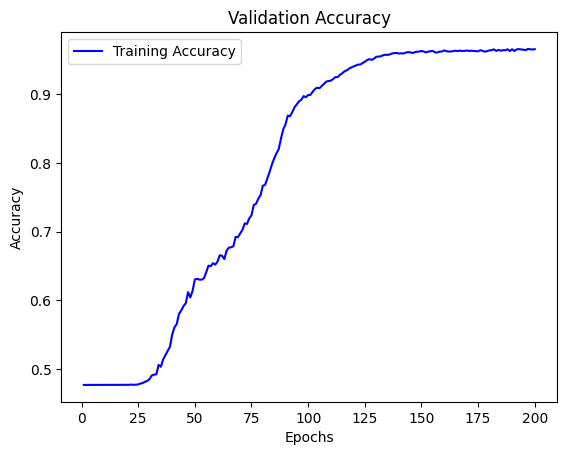

In [ ]:
%matplotlib inline

history_dict = history.history
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

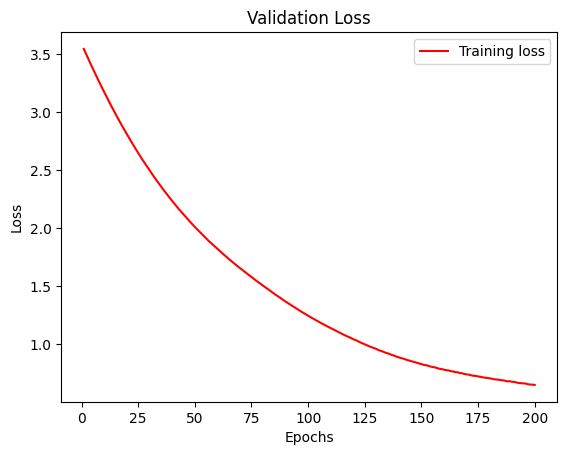

In [ ]:
%matplotlib inline

history_dict = history.history
history_dict.keys()


loss = history_dict['loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r-', label='Training loss')

plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
result=model.predict(X_test_reshape)
result

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[[0.23894371]],

       [[0.2042944 ]],

       [[0.78114456]],

       ...,

       [[0.20544462]],

       [[0.7813441 ]],

       [[0.76171416]]], dtype=float32)

In [ ]:
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test_reshape).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.9897040720973277


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test_reshape) > 0.659
#pred = model.predict(test_y) > 0.75
truth = y_test
pred

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[[False]],

       [[False]],

       [[ True]],

       ...,

       [[False]],

       [[ True]],

       [[ True]]])

In [ ]:
!pip install scikeras

In [ ]:

from sklearn.model_selection import KFold, cross_val_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
from scikeras.wrappers import KerasClassifier
from keras.models import Sequential
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense

def create_model(optimizer='adam', activation = 'sigmoid', hidden_layers=1):
  # Initialize the constructor
  model = Sequential()
  # Add an input layer
  model.add(Dense(5, activation=activation, input_shape=((X_train.shape[1],)),))

  for i in range(hidden_layers):
      # Add one hidden layer
      model.add(Dense(8, activation=activation))

  # Add an output layer
  model.add(Dense(1, activation=activation))
  #compile model
  model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=
  ['accuracy'])
  return model
model = KerasClassifier(model=create_model, verbose=0) # Create a Ke



param_grid = {
    'model__optimizer': ['adam', 'sgd', 'rmsprop'], # Use 'model__' prefix for model parameters
    'model__activation': ['relu', 'sigmoid', 'tanh'],
    'model__hidden_layers': [4, 12, 16 ]# Use 'model__' prefix for model parameters
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train, shuffle=True)

outer_cv = KFold(n_splits=5)

# Nested CV
nested_score = cross_val_score(grid_search, X_train, y_train, cv=outer_cv)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [ ]:
print("Nested CV Score: ", nested_score.mean())

Nested CV Score:  0.5521228430801057


In [ ]:
from sklearn.metrics import matthews_corrcoef
grid_score=grid_search_result.best_score_

In [ ]:
# memory states will have a size of units.

print(grid_search_result.best_params_)

{'model__activation': 'relu', 'model__hidden_layers': 12, 'model__optimizer': 'rmsprop'}


In [ ]:
from sklearn.metrics import accuracy_score # impo
best_grid = grid_search.best_estimator_
y_pred = best_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.4851694915254237

  model__hidden_layers': 10

In [ ]:
import tensorflow.keras.backend as K
print(output_layer.shape)
print(K.eval(output_layer))



(None, 1, 1)
<KerasTensor shape=(None, 1, 1), dtype=float32, sparse=False, name=keras_tensor_7>


In [ ]:
print(input_layer.shape)

In [ ]:
#model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(7552, 1, 138), dtype=float32). Expected shape (None, 138), but input has incompatible shape (7552, 1, 138)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(7552, 1, 138), dtype=float32)
  • training=True
  • mask=None

In [ ]:
# adam', loss='BinaryCrossentropy' for sequential model
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
0.9897040720973277


In [ ]:
# adam', loss='BinaryCrossentropy' for sequential model
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test_reshape).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
0.9897040720973277


   bi lstm used now

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
numberOfLSTMunits= 16

input =Input(shape=(timesteps, features))
all_state_h= LSTM(numberOfLSTMunits, return_sequences=True) (input)

output_tensor = model(input)

# Assuming 'model1' is intended to be the new model with the LSTM layer:
model1 = tf.keras.Model(inputs=input, outputs=all_state_h)
model1.summary()

In [ ]:
result=model.predict(X_train_reshape)

print('input shape:  ', X_train_reshape.shape)
print('all_state_h shape: ', result.shape)
print('\nhidden states for the first sample: \n', result[0])
print('\nhidden states for the first sample at the second time step: \n', result[1])

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
input shape:   (7551, 1, 138)
all_state_h shape:  (7551, 1, 1)

hidden states for the first sample: 
 [[0.22604455]]

hidden states for the first sample at the second time step: 
 [[0.78126806]]


In [ ]:
result=model.predict(X_test_reshape)
result

In [ ]:
model.summary()

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier
def create_model(optimizer='adam', activation='relu'):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(units=32, activation=activation, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(units=64, activation=activation),
        tf.keras.layers.Dense(units=12, activation=activation, kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        tf.keras.layers.Dense(units=1, activation='sigmoid'),
    ])
    model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=0) # Create a Ke



param_grid = {
    'model__optimizer': ['adam', 'sgd', 'rmsprop'], # Use 'model__' prefix for model parameters
    'model__activation': ['relu', 'sigmoid', 'tanh'] # Use 'model__' prefix for model parameters
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_search_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [ ]:

print(grid_search_result.best_params_)

{'model__activation': 'relu', 'model__optimizer': 'rmsprop'}


In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
for item in lab_1:
    print(item)

In [ ]:
print(lab_1.shape)
print(X.shape)

In [ ]:
print(lab_2.shape)
print(X.shape)

In [ ]:
for item in lab_1:
    print(item)

In [ ]:
print(lab_1.data)

In [ ]:
print(lab.values)

In [ ]:
print(lab.shape)
print(X.shape)

In [ ]:
all_indices = list(range(lab_1.shape[0])) # Use the first dimension of the dataset for indices
#df2.drop(['SEQ'] ,axis=1, inplace=True)
#all_indices = list(range(df2.shape[0]))
train_ind, test_ind = train_test_split(all_indices, test_size=0.2,shuffle=True)
X_train = X[train_ind]
X_test = X[test_ind]
y_train = y[train_ind]
y_test = y[test_ind]
# Correctly index the dataset along the first axis
#X_train = X.iloc[train_ind]
#X_train = X[train_ind, :, :]  # Select samples using train_ind along the first axis
#X_test = X.iloc[test_ind] #Use iloc to select rows from X using test_ind
y_train = y.iloc[train_ind] #Use iloc to select rows from y using train_ind
y_test = y.iloc[test_ind] #Use iloc to select rows from y using test_ind

In [ ]:
# implemented now 512bchanged to 12 acc=66.6 implemented current
# with layers.Flatten
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [ ]:
import numpy as np

# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_12)
# Assuming you want to flatten the last two dimensions (10, 3) into a single dimension (30)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)


# Now predict using the reshaped data
predictions = model.predict(samples_to_predict)
print(predictions)

In [ ]:
import numpy as np

# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_12)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

total_elements = samples_to_predict.size
# Calculate the correct number of rows to perfectly fit the data
# Dividing the total elements by the desired number of columns, 138
num_rows = samples_to_predict.size // 138

# Calculate the remainder to see if elements would be lost
remainder = samples_to_predict.size % 138

# If there's a remainder, adjust num_rows to accommodate all elements, but only if remainder is not zero
# Because, if remainder is 0, the reshape operation would work as intended with current num_rows calculation
if remainder != 0:
    num_rows += 1 # Adding an extra row to hold the remaining elements

# Now, before reshaping, if there is a remainder, pad the array with zeros
# to make it divisible by the target shape
if remainder != 0:
    padding_shape = (num_rows * 138) - samples_to_predict.size
    samples_to_predict = np.pad(samples_to_predict, (0, padding_shape), 'constant', constant_values=0)

# Reshape using the adjusted num_rows, 138 columns
# There shouldn't be any loss of data now
samples_to_predict = samples_to_predict.reshape(num_rows, 138)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)

# Now predict using the reshaped data
predictions = model.predict(samples_to_predict)
print(predictions)

In [ ]:
import numpy as np

# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_12)


expected_input_shape = (timesteps,features)
# Below is a potential way to reshape assuming your model expects 138 features:
num_samples = samples_to_predict.shape[0]
# Initialize an empty array to store the reshaped data.

reshaped_data = np.zeros((num_samples, 138))


for i in range(num_samples):
    # Extract features from your original data.
    features = samples_to_predict[i].flatten() # this might need modification.
    # Pad with zeros to ensure size 138
    features = np.pad(features, (0, 0, 'constant')[:features])
    truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - samples_to_predict.shape[2])), 'constant')
    reshaped_data[i] = features

# Check the shape of the reshaped data
print(reshaped_data.shape)

# Now predict using the reshaped data
predictions = model.predict(reshaped_data)
print(predictions)

In [ ]:
import numpy as np

# Reshape to have the correct number of features (assuming X_train.shape[1] is 30)
samples_to_predict = np.array(lab_5)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1) # Reshape to (num_samples, 30)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)

# Now predict using the reshaped data
predictions = model.predict(samples_to_predict)
print(predictions)

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
X_train.shape

In [ ]:
lab_5.shape

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
model.summary()

In [ ]:
model.summary()

In [ ]:
# padded seq
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

AttributeError: 'KerasClassifier' object has no attribute 'compile'

In [ ]:
%matplotlib inline

history_dict = history.history
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training Accuracy')

plt.title('Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import roc_auc_score
def auc_score(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
def auc(y_true, y_pred):
    return tf.py_func(auc_score, (y_true, y_pred), tf.double)
#in model.compile you can use auc function name
optimizer = 'adam'
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=[auc])

In [ ]:
# adam', loss='BinaryCrossentropy' for sequential model
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

In [ ]:
# adam', loss='BinaryCrossentropy' for sequential model
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Install and import ggplot if you haven't already
!pip install ggplot
#from ggplot import *
!pip install plotnine
from plotnine import *
from plotnine.data import mtcars
import pandas as pd
from sklearn.metrics import roc_curve, auc

In [ ]:

# Create a DataFrame with 'fpr' and 'tpr' columns
df = pd.DataFrame({'fpr': fpr_keras, 'tpr': tpr_keras})

(ggplot(df, aes(x='fpr')) +  # Removed ymin and ymax from the main aes
 geom_line(aes(y='tpr')) +
 geom_area(aes(y='tpr'), alpha=0.2) +  # Added aes(y='tpr') to geom_area
 ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)))

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

y_pred_keras = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
# Install and import ggplot if you haven't already
!pip install ggplot
#from ggplot import *
!pip install plotnine
from plotnine import *
from plotnine.data import mtcars
import pandas as pd
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC

# Create a DataFrame with 'fpr' and 'tpr' columns
df = pd.DataFrame({'fpr': fpr_keras, 'tpr': tpr_keras})

# Now you can use 'df' in your ggplot call
# Assuming 'df' is defined and contains the 'fpr' and 'tpr' columns
(ggplot(df, aes(x='fpr', ymin=0, ymax='tpr')) +
 geom_line(aes(y='tpr')) +
 geom_area(alpha=0.2) +
 ggtitle("ROC Curve w/ AUC = %s" % str(roc_auc)))


In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['AUC'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test_reshape, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['AUC'])
# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test_reshape, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1847652196884155
Test accuracy: 0.5178974866867065


In [ ]:
print(features)


In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
timesteps = 1  # Example: If each sample is a single timestep
features = X_train.shape[1]
X_train_reshape = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_reshape = X_test.reshape(X_test.shape[0], timesteps, features) # Resha
# Use the reshaped data for training
history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train)) # Pass reshaped d

In [ ]:
from sklearn.metrics import roc_curve, auc

X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

In [ ]:
#this one for lstm
from sklearn.metrics import roc_curve, auc

# Reshape X_test to include the timesteps dimension
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))
y_pred_keras = model.predict(X_test_reshaped).ravel() # Use X_test_reshaped for prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

In [ ]:
predictions = model.predict(padded_sequences[:4])
for pred in predictions:
    print(pred[0])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
timesteps = 1  # Example: If each sample is a single timestep
features = X_train.shape[1]
X_train_reshape = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_reshape = X_test.reshape(X_test.shape[0], timesteps, features) # Resha
# Use the reshaped data for training
history = model.fit(X_train_reshape, y_train, validation_data=(X_test_reshape, y_test), epochs=200, batch_size=len(X_train)) # Pass reshaped d

In [ ]:
# bi lstm
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test_reshape, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.1847655773162842
Test accuracy: 0.5178974866867065


In [ ]:
model.summary()

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers



# Reshape X_train and y_train to have the same number of samples in the first dimension
X_train = X_train.reshape(X_train.shape[0], -1)  # Reshape X_train to (3939, num_features)
y_train = y_train.reshape(y_train.shape[0], -1)  # Reshape y_train to (3614, num_features)

# Find the minimum number of samples between X_train and y_train
min_samples = min(X_train.shape[0], y_train.shape[0])

# Truncate X_train and y_train to have the same number of samples
X_train = X_train[:min_samples]
y_train = y_train[:min_samples]

# Reshape X_test and y_test to have the same number of samples in the first dimension
X_test = X_test.reshape(X_test.shape[0], -1)  # Reshape X_test to (num_samples, num_features)
y_test = y_test.reshape(y_test.shape[0], -1)  # Reshape y_test to (num_samples, num_features)

# Find the minimum number of samples between X_test and y_test
min_samples_test = min(X_test.shape[0], y_test.shape[0])

# Truncate X_test and y_test to have the same number of samples
X_test = X_test[:min_samples_test]
y_test = y_test[:min_samples_test]

In [ ]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_1 = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
# implemented now 512bchanged to 12 acc=66.6 implemented current
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))



In [ ]:
!pip install ggplot

In [ ]:
from sklearn.metrics import roc_curve
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))

# Predict using the reshaped input
y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
#

y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_keras)



plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


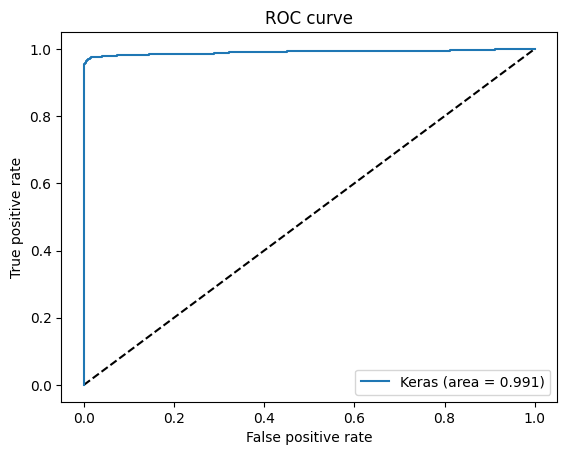

In [ ]:
from sklearn.metrics import roc_curve
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))

# Predict using the reshaped input
y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
#

y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_keras)



plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


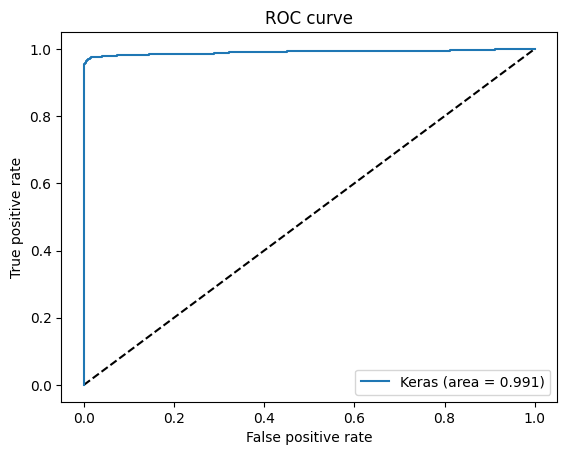

In [ ]:
from sklearn.metrics import roc_curve
X_test_reshaped = X_test.reshape((-1, 1, X_test.shape[1]))

# Predict using the reshaped input
y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
#

y_pred_keras = model.predict(X_test_reshaped).ravel()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_keras)



plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

 These are user downloaded sequences example from Uniprot in fasta format

In [ ]:
!wget https://raw.githubusercontent.com/arnavdas88/protein-epitope-analytics/main/uniprot.fasta?token=AJINPMMP2ERHQDUMQXSXFGDBVZZLQ -O uniprot.fasta

--2024-11-25 09:19:45--  https://raw.githubusercontent.com/arnavdas88/protein-epitope-analytics/main/uniprot.fasta?token=AJINPMMP2ERHQDUMQXSXFGDBVZZLQ
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21935788 (21M) [text/plain]
Saving to: ‘uniprot.fasta’

uniprot.fasta       100%[===================>]  20.92M  --.-KB/s    in 0.08s   

2024-11-25 09:19:45 (271 MB/s) - ‘uniprot.fasta’ saved [21935788/21935788]



In [ ]:
!pip install biopython
!pip install pqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 75.8 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
from Bio import SeqIO
from tqdm import tqdm
# from pqdm.processes import pqdm
# from pqdm.threads import pqdm
import time

import multiprocessing as mp

In [ ]:
string = ""

type_str = {}

def get_type(desc):
    d = desc.upper()
    d = "DENGUE" + d.split("DENGUE")[-1]


    d = d.split(" OX=")[0]
    d = d.split(" (")[0]
    d = d.replace("TYPE ", "")
    return d

for record in SeqIO.parse("uniprot.fasta", "fasta"):
    fragment_id = record.id
    name = record.name
    description = record.description
    seq = record.seq
    # print(get_type(description))
    # input()

    type_str[get_type(description)] = str(seq) + type_str.get(get_type(description), "")

    string += str(seq)

In [ ]:
def find_repeation(string, chunk_size):
    repeated_sequence = {}
    pure_sequence = []

    for i in tqdm(range(0, len(string) - chunk_size)):
        chunk = string[i:i+chunk_size]
        if chunk in string[i+chunk_size:] or chunk in repeated_sequence:
            repeated_sequence[chunk] = repeated_sequence.get(chunk, 0) + 1
        else:
            pure_sequence += [ chunk ]

    return repeated_sequence, pure_sequence

In [ ]:
def worker_wrapper(*arg):
    string, chunk_size = arg
    print(string, chunk_size)
    return find_repeation(string, chunk_size)

def find_parallel_repeation(string, chunk_size, N=None):
    string_leb = [string[i:i+N] for i in range(0, len(string), N)]

    assert sum([len(s) for s in string_leb]) == len(string)

    pool = mp.Pool(mp.cpu_count())
    args_list = [ (s, chunk_size) for s in string_leb]
    # results = [pool.apply(worker_wrapper, args=args) for args in args_list]
    # pool.close()
    pool.map(worker_wrapper, args_list)

    return result


# parallel = int(len(string) / 100) # string_leb
# result = find_parallel_repeation(string, chunk_size,  parallel)

In [ ]:
def merge(dictA, dictB):
    for key, value in dictA.items():
        if key in dictB:
            dictB[key] += value
        else:
            dictB[key] = value
    return dictB.copy()

In [ ]:
from multiprocessing import Pool

def total_data(chunk = 20):

    batches = [i for i in range(0, 101, 5)]

    args = []

    for i in range(len(batches) - 1):
        start = batches[i]
        end   = batches[i+1]

        start = int(len(string) * (start / 100))
        end = int(len(string) * (end / 100))

        args += [ (string[start:end], chunk) ]

    pool = Pool()
    data = pool.starmap(find_repeation, args)

    all_repeated_sequence = {}

    print("Merging the sequences...")

    for n in range(len(batches) - 1):
        (repeated_sequence, _) = data[n]
        all_repeated_sequence = merge(all_repeated_sequence, repeated_sequence)
        del repeated_sequence

    return all_repeated_sequence

In [ ]:
from multiprocessing import Pool

def total_data(chunk=20):
    """
    Processes the data to find repeated sequences and merges the results.

    Args:
        chunk (int, optional): The size of the chunk to process. Defaults to 20.

    Returns:
        dict: A dictionary containing the repeated sequences and their counts.
    """
    batches = [i for i in range(0, 101, 5)]
    args = []

    global string
    # Define string within the function if it's not found globally
    # This will prevent the UnboundLocalError
    if 'string' not in globals():
        string = "This is a test string for demonstration purposes. This is a test string for demonstration purposes."
        print("Warning: 'string' variable not found. Using a default string.")
    # Alternatively, you could pass 'string' as an argument to the function:
    # def total_data(string, chunk=20):

    for i in range(len(batches) - 1):
        start = batches[i]
        end = batches[i + 1]

        start = int(len(string) * (start / 100))
        end = int(len(string) * (end / 100))

        args += [(string[start:end], chunk)]

    with Pool() as pool:  # Use context manager for better resource management
        data = pool.starmap(find_repeation, args)

    all_repeated_sequence = {}

    print("Merging the sequences...")

    for n in range(len(batches) - 1):
        (repeated_sequence, _) = data[n]
        all_repeated_sequence = merge(all_repeated_sequence, repeated_sequence)
        del repeated_sequence  # Optional: Delete to potentially free up memory

    return all_repeated_sequence

# Ensure 'find_repeation' function is defined
# (Include the implementation from previous responses if necessary)
def find_repeation(text, chunk_size):
    """
    A placeholder for the actual find_repeation function.
    This should be replaced with the actual logic to find repeated sequences.

    Args:
        text (str): The text to search in.
        chunk_size (int): The size of the chunk to consider.

    Returns:
        tuple: A tuple containing a dictionary of repeated sequences and their counts,
               and any other relevant data.
    """
    # Placeholder logic - replace with the actual implementation
    repeated_sequences = {}
    # ... (logic to find repeated sequences) ...
    for i in range(len(text) - chunk_size + 1):
        sequence = text[i:i + chunk_size]
        if sequence in repeated_sequences:
            repeated_sequences[sequence] += 1
        else:
            repeated_sequences[sequence] = 1

    # Filter out sequences that only appear once
    repeated_sequences = {seq: count for seq, count in repeated_sequences.items() if count > 1}

    return repeated_sequences, None

# Call total_data and print the result, instead of printing repeated_sequences directly
repeated_sequence_data = total_data(chunk=10)
print(repeated_sequence_data)

Merging the sequences...
{'LRMDKLQLKG': 2050, 'RMDKLQLKGM': 2047, 'MDKLQLKGMS': 2049, 'DKLQLKGMSY': 2053, 'KLQLKGMSYS': 2042, 'LQLKGMSYSM': 2046, 'QLKGMSYSMC': 2057, 'LKGMSYSMCT': 2059, 'KGMSYSMCTG': 2060, 'GMSYSMCTGK': 2060, 'MSYSMCTGKF': 2060, 'SYSMCTGKFK': 2060, 'YSMCTGKFKI': 661, 'SMCTGKFKIV': 660, 'MCTGKFKIVK': 661, 'CTGKFKIVKE': 661, 'TGKFKIVKEI': 660, 'GKFKIVKEIA': 661, 'KFKIVKEIAE': 661, 'FKIVKEIAET': 661, 'KIVKEIAETQ': 661, 'IVKEIAETQH': 662, 'VKEIAETQHG': 2060, 'KEIAETQHGT': 2064, 'EIAETQHGTI': 2063, 'IAETQHGTIV': 2060, 'AETQHGTIVI': 1866, 'ETQHGTIVIR': 1862, 'TQHGTIVIRV': 1841, 'QHGTIVIRVQ': 1839, 'HGTIVIRVQY': 1845, 'GTIVIRVQYE': 1845, 'TIVIRVQYEG': 1845, 'IVIRVQYEGD': 1843, 'VIRVQYEGDG': 1830, 'IRVQYEGDGS': 1827, 'RVQYEGDGSP': 1992, 'VQYEGDGSPC': 1993, 'QYEGDGSPCK': 2034, 'YEGDGSPCKI': 2020, 'EGDGSPCKIP': 2033, 'GDGSPCKIPF': 2021, 'DGSPCKIPFE': 2021, 'GSPCKIPFEI': 2022, 'SPCKIPFEIM': 1645, 'PCKIPFEIMD': 1652, 'CKIPFEIMDL': 1653, 'KIPFEIMDLE': 1653, 'IPFEIMDLEK': 1661, 'PFE

In [ ]:
final_dict = []

for seq, rep in repeated_sequence_data.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
import pandas as pd

df1 = pd.DataFrame.from_dict(final_dict)

df1.head()

,Sequence,Repeation,Seen In
0,LRMDKLQLKG,2050,"DENGUE VIRUS 2, DENGUE VIRUS 1, DENGUE VIRUS"
1,RMDKLQLKGM,2047,"DENGUE VIRUS 2, DENGUE VIRUS 1, DENGUE VIRUS"
2,MDKLQLKGMS,2049,"DENGUE VIRUS 2, DENGUE VIRUS 1, DENGUE VIRUS"
3,DKLQLKGMSY,2053,"DENGUE VIRUS 2, DENGUE VIRUS 1, DENGUE VIRUS"
4,KLQLKGMSYS,2042,"DENGUE VIRUS 2, DENGUE VIRUS 1, DENGUE VIRUS"


In [ ]:
df1.to_csv("100% seq chunk-10.csv", index=False, )

In [ ]:
f'The most common sequence being repeated {max(repeated_sequence_data.values())} times.'

'The most common sequence being repeated 37433 times.'

In [ ]:
df1.describe()

,Repeation
count,49780.000000
mean,407.753515
std,854.056590
min,2.000000
25%,2.000000
50%,14.000000
75%,381.000000
max,37433.000000


In [ ]:
# new AI code

import pandas as pd

# Check if final_dict is not empty before creating the DataFrame
if final_dict:
    df = pd.DataFrame.from_dict(final_dict)
else:
    # Handle the case where final_dict is empty, e.g., by creating an empty DataFrame with the expected columns
    df = pd.DataFrame(columns=['Sequence', 'Repeation', 'Seen In'])

# Now you can proceed with filtering
filtered_df = df[
    df["Seen In"].str.contains("DENGUE VIRUS 4") &
    df["Seen In"].str.contains("DENGUE VIRUS 3") &
    df["Seen In"].str.contains("DENGUE VIRUS 2") &
    df["Seen In"].str.contains("DENGUE VIRUS 1")
]

filtered_df.head()

,Sequence,Repeation,Seen In
124,RMAILGDTAW,6008,"DENGUE VIRUS 2, DENGUE VIRUS 4, DENGUE VIRUS 1..."
125,MAILGDTAWD,6025,"DENGUE VIRUS 2, DENGUE VIRUS 4, DENGUE VIRUS 1..."
126,AILGDTAWDF,6031,"DENGUE VIRUS 2, DENGUE VIRUS 4, DENGUE VIRUS 1..."
127,ILGDTAWDFG,6063,"DENGUE VIRUS 2, DENGUE VIRUS 4, DENGUE VIRUS 1..."
128,LGDTAWDFGS,6077,"DENGUE VIRUS 2, DENGUE VIRUS 4, DENGUE VIRUS 1..."


In [ ]:

filtered_dataset_X = encode(filtered_df['Sequence'])
#antigens = np.array(filtered_dataset_X)
antigens = np.array(filtered_dataset_X).reshape(-1, 10, 3)
#samples_to_predict = np.array(antigens)
import numpy as np

filtered_dataset_X = encode(filtered_df['Sequence'])

# Ensure filtered_dataset_X is a NumPy array with the correct shape and data type
filtered_dataset_X = np.array([np.array(seq, dtype=np.float32) for seq in filtered_dataset_X])

# Reshape the array to match the expected input shape of your model
# Assuming your model expects an input shape of (None, 10, 3), then:
antigens = filtered_dataset_X.reshape(-1, 10, 3)

# Verify the shape of antigens
print("Shape of antigens after reshape:", antigens.shape)
print("Data type of antigens:", antigens.dtype)



KeyError: 0

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)

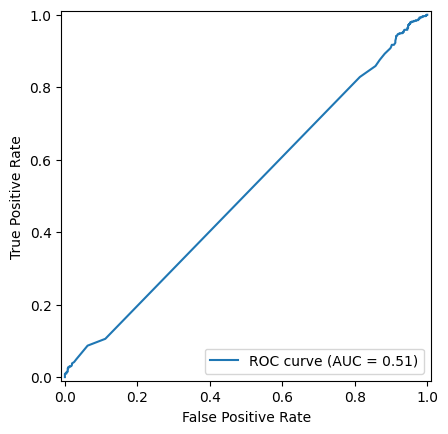

In [ ]:
# Predicting probabilities
import sklearn.metrics as metrics
roc_auc = metrics.auc(fpr_keras, tpr_keras)
display = metrics.RocCurveDisplay(fpr=fpr_keras, tpr=tpr_keras, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()


In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
#

y_pred_keras = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_keras)



plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
#

y_pred_keras = model.predict(test_X).ravel()
fpr, tpr, thresholds = roc_curve(test_y, y_pred_keras)



plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
#plt.plot(fpr_rf, tpr_rf, label='RF (area = {:.3f})'.format(auc_rf))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [ ]:
import numpy as np
from tensorflow import keras

# Get the expected input shape of the model
input_shape = model.layers[0].shape  # Assuming the first layer is the input layer

# Reshape X_test to match the expected input shape if necessary
if input_shape[1] is not None and input_shape[1] != X_test.shape[1]:
    print(f"Reshaping X_test from {X_test.shape} to ({X_test.shape[0]}, {input_shape[1]})")
    # Assuming your model expects a specific number of features
    # You might need to adjust the reshaping logic if your model expects a different shape
    X_test = X_test[:, :input_shape[1]]
    # or use padding if X_test has fewer features

# Alternatively, if the input shape is flexible and the error is due to data type:
try:
    X_test = X_test.astype(np.float32) # Ensure X_test has the correct data type
except Exception as e:
    print(f"Error during type casting: {e}")
    # Handle the exception, e.g., by investigating the data type of X_test

# Now predict using the reshaped/type-casted data
y_pred_keras = model.predict(X_test).ravel()

In [ ]:
from sklearn.metrics import accuracy_score
# Make predictions on the test set
y_pred = model.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
##early stoppping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=40, callbacks=[early_stopping])

In [ ]:
##early stoppping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=40, callbacks=[early_stopping])

In [ ]:
!pip install scikeras

In [ ]:
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from scikeras.wrappers import KerasClassifier

from sklearn.model_selection import GridSearchCV

estimator = KerasRegressor( model=model,epoch=20, verbose=0)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3, scoring='neg_mean_squared_error')
gs=GridSearchCV(estimator=estimator, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error')
gs = gs.fit(X_train, y_train)
best_params=gs.best_params_
accuracy=gs.best_score_

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = gs_result.cv_results_['mean_test_score']
stds = gs_result.cv_results_['std_test_score']
params = gs_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, param_grid):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
from sklearn.metrics import accuracy_score
model.fit(X_test, y_test)
prediction = model.predict(X_test)
#accuracy_score(y_test, prediction)

In [ ]:
!pip install shap # Install the shap library

In [ ]:
!pip install tensorflow  # Install or upgrade TensorFlow
!pip install scikit-learn # install scikit-learn

In [ ]:
model.summary()

current model above

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error']

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=len(X_train))

In [ ]:
# implemented last ---000
model.compile(loss='mean_squared_error',
               optimizer='adam',
               metrics=['mean_squared_error'])

In [ ]:
# added new minmaxscaler before splitting
 # implemented last
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=len(X_train))




In [ ]:
# mse
model.compile(optimizer='adam', loss="mse", metrics=[  ] )
model.summary()

In [ ]:
predicton = model.predict(X_test)

In [ ]:
import from tf.keras.metrics.RootMeanSquaredError(

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['fmeasure'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=len(X_train))

In [ ]:
# implemented now 512bchanged to 12 acc=66.6


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=y_train.shape[1],activation='sigmoid'),
])

In [ ]:
# implemeted now 512 changed
# implemented last
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=80, batch_size=len(X_train))



In [ ]:
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=100, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train_1.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid'),
])

model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_1, y_train, validation_data=(X_test_1, y_test), epochs=150, batch_size=len(X_train_1))



In [ ]:
#
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=100, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_1 = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,input_shape=X_train.shape[1], activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=y_train.shape[1],activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['AUC'])

In [ ]:
#ncreasing the learning rate ::: learning_rate=0.1, momentum=0.9

from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test_1, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid'),
])

model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['AUC'])

# Reshape X_train to match the number of samples in y_train
X_train = X_train.reshape(y_train.shape[0])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=len(X_train))

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['AUC'])

In [ ]:
!wget https://www.uniprot.org/uniprotkb?query=dengue+vaccine -O uniprotkb_2.fasta

In [ ]:
!wget https://raw.githubusercontent.com/arnavdas88/protein-epitope-analytics/main/uniprot.fasta?token=AJINPMMP2ERHQDUMQXSXFGDBVZZLQ -O uniprot.fasta

In [ ]:
!pip install biopython
!pip install pqdm

In [ ]:
from Bio import SeqIO
from tqdm import tqdm
# from pqdm.processes import pqdm
# from pqdm.threads import pqdm
import time

import multiprocessing as mp

In [ ]:
string = ""

type_str = {}

def get_type(desc):
    d = desc.upper()
    d = "DENGUE" + d.split("DENGUE")[-1]


    d = d.split(" OX=")[0]
    d = d.split(" (")[0]
    d = d.replace("TYPE ", "")
    return d

for record in SeqIO.parse("uniprotkb_Dengue_polyprotein.fasta", "fasta"):
    fragment_id = record.id
    name = record.name
    description = record.description
    seq = record.seq
    # print(get_type(description))
    # input()

    type_str[get_type(description)] = str(seq) + type_str.get(get_type(description), "")

    string += str(seq)

In [ ]:
type_str.keys()

In [ ]:
chunk_size = 10

In [ ]:
def find_repeation(string, chunk_size):
    repeated_sequence = {}
    pure_sequence = []

    for i in tqdm(range(0, len(string) - chunk_size)):
        chunk = string[i:i+chunk_size]
        if chunk in string[i+chunk_size:] or chunk in repeated_sequence:
            repeated_sequence[chunk] = repeated_sequence.get(chunk, 0) + 1
        else:
            pure_sequence += [ chunk ]

    return repeated_sequence, pure_sequence

In [ ]:
print(string)

In [ ]:
def worker_wrapper(*arg):
    string, chunk_size = arg
    print(string, chunk_size)
    return find_repeation(string, chunk_size)

def find_parallel_repeation(string, chunk_size, N=None):
    string_leb = [string[i:i+N] for i in range(0, len(string), N)]

    assert sum([len(s) for s in string_leb]) == len(string)

    pool = mp.Pool(mp.cpu_count())
    args_list = [ (s, chunk_size) for s in string_leb]
    # results = [pool.apply(worker_wrapper, args=args) for args in args_list]
    # pool.close()
    pool.map(worker_wrapper, args_list)

    return result


In [ ]:
print(string)

In [ ]:
def merge(dictA, dictB):
    for key, value in dictA.items():
        if key in dictB:
            dictB[key] += value
        else:
            dictB[key] = value
    return dictB.copy()

In [ ]:
print(merge)

In [ ]:
from multiprocessing import Pool

def total_data(chunk = 20):

    batches = [i for i in range(0, 101, 5)]

    args = []

    for i in range(len(batches) - 1):
        start = batches[i]
        end   = batches[i+1]

        start = int(len(string) * (start / 100))
        end = int(len(string) * (end / 100))

        args += [ (string[start:end], chunk) ]

    pool = Pool()
    data = pool.starmap(find_repeation, args)

    all_repeated_sequence = {}

    print("Merging the sequences...")

    for n in range(len(batches) - 1):
        (repeated_sequence, _) = data[n]
        all_repeated_sequence = merge(all_repeated_sequence, repeated_sequence)
        del repeated_sequence

    return all_repeated_sequence

In [ ]:
print(total_data)

In [ ]:
repeated_sequence = total_data(chunk = 10)

In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
import pandas as pd
from google.colab import data_table

df1 = pd.DataFrame.from_dict(final_dict)

df1.head()


In [ ]:
# Filter
filtered_df_1 = df1[
                 df1["Seen In"].str.contains("DENGUE VIRUS 4") &
                 df1["Seen In"].str.contains("DENGUE VIRUS 3") &
                 df1["Seen In"].str.contains("DENGUE VIRUS 2") &
                 df1["Seen In"].str.contains("DENGUE VIRUS 1")
            ]

filtered_df_1.head()

In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    # Ensure type_str is defined and accessible
    # Assuming type_str is a dictionary where keys are variant names
    # and values are lists of sequences

    # If type_str is not defined, replace with the actual variable name
    # If it's in a different scope, import or access it appropriately

    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict.append(row) # Use append instead of += for list of dictionaries

#Check if final_dict is not empty before creating the dataframe
if final_dict: #Proceed if final_dict is not empty
    import pandas as pd
    df1 = pd.DataFrame.from_dict(final_dict)
else: #Print a message if final_dict is empty
    print("final_dict is empty. Check the logic that populates it.")

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(final_dict)

df.head()

In [ ]:
# Filter
filtered_df1 = df1[
                 df1["type"].str.contains("DENGUE VIRUS ") &
                 df1["type"].str.contains("DENGUE VIRUS type") &
                 df1["type"].str.contains("DENGUE VIRUS 2") &
                 df1["type"].str.contains("DENGUE VIRUS 1")
            ]

filtered_df.head()

KeyError: 'type'

In [ ]:
df.to_csv("100% seq chunk-10.csv", index=False, )
filtered_df_1.to_csv("[filtered]100% seq chunk-10.csv", index=False, )


In [ ]:
df1.to_csv("100% seq chunk-10.csv", index=False, )
filtered_df1.to_csv("[filtered]100% seq chunk-10.csv", index=False, )


In [ ]:
## till till

In [ ]:

filtered_dataset_X = encode(filtered_df_1['Sequence'])
#antigens = np.array(filtered_dataset_X)
antigens = np.array(filtered_dataset_X).reshape(-1, 10, 3)
#samples_to_predict = np.array(antigens)
import numpy as np

filtered_dataset_X = encode(filtered_df_1['Sequence'])

# Ensure filtered_dataset_X is a NumPy array with the correct shape and data type
filtered_dataset_X = np.array([np.array(seq, dtype=np.float32) for seq in filtered_dataset_X])

# Reshape the array to match the expected input shape of your model
# Assuming your model expects an input shape of (None, 10, 3), then:
antigens = filtered_dataset_X.reshape(-1, 10, 3)

# Verify the shape of antigens
print("Shape of antigens after reshape:", antigens.shape)
print("Data type of antigens:", antigens.dtype)

import tensorflow as tf
antigens = tf.convert_to_tensor(antigens, dtype=tf.float32) # Convert to TensorFlow tensor












NameError: name 'filtered_df_1' is not defined

In [ ]:
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import LayerNormalization, BatchNormalization # Import BatchNormalization
from tensorflow.keras.optimizers import SGD

# instantiate model
model = Sequential()

# we can think of this chunk as the input layer
model.add(Dense(64,input_shape=(X_train.shape[1],),))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the hidden layer
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

# we can think of this chunk as the output layer
model.add(Dense(2,))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation='sigmoid'))


# setting up the optimization of our weights
sgd = SGD(learning_rate=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['AUC'])


In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=len(X_train))

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=40, verbose=0)

if isinstance(score, list):
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
else:
    print('Test loss:', score)
print('Test accuracy:', score[1])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(1e-2),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.keras.metrics.AUC(from_logits=True)])

In [ ]:
score = model.evaluate(X_test, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

   flatten relu 125 units

   model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128,input_shape=X_train.shape[1], activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(30, activation='relu'),
  tf.keras.layers.Dense(30, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=y_train.shape[1],activation='sigmoid')
])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=len(X_train))

In [ ]:
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train_1.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid'),
])

model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_1, y_train, validation_data=(X_test_1, y_test), epochs=200, batch_size=len(X_train_1))


In [ ]:
# Evaluate your model
score = model.evaluate(X_test_1, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#scaler = MinMaxScaler(feature_range=(-5,4))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#Reshape y_train to have 1 column and the necessary number of rows
y_train = y_train.reshape(-1, 1)
# Reshape y_test to have 1 column and the necessary number of rows (use len(y_test) here)
y_test = y_test.reshape(-1, 1)

#y_train = y_train.reshape(len(y_train), 1)
#y_test = y_test.reshape(len(y_train), 1)

#scaler = StandardScaler()
# fit scaler on training dataset
#scaler.fit(y_train)
# transform training dataset
#y_train = scaler.transform(y_train)
# transform test dataset
#y_test = scaler.transform(y_test)

# Fit and transform on the training data
y_train = scaler.fit_transform(y_train)

# Transform the test data
y_test = scaler.transform(y_test)

# Reshape back to the original shape if necessary
y_train = y_train.ravel() # Assuming your original y_train was 1D
y_test = y_test.ravel() # Assuming your original y_test was 1D


In [ ]:
from tensorflow.keras.metrics import AUC
model = Sequential()
model.add(Dense(25, input_dim=20, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='linear'))
# compile model

model.compile(loss='BinaryCrossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9), metrics=[AUC()])
# model.compile(loss='BinaryCrossentropy', optimizer=SGD(learning_rate=0.01, momentum=0.9, metrics=[AUC()])
# fit model

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[0], activation='sigmoid'),
])

model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))


In [ ]:
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test_1 = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train_1.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid'),
])

model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_1, y_train, validation_data=(X_test_1, y_test), epochs=150, batch_size=len(X_train_1))


In [ ]:
# use X_test ## always recompile before model evaluate
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#X_test_1 gives lower results
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test_1, y_test, batch_size=120, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# using metric accuracy gives
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Evaluate your model
score = model.evaluate(X_test_1, y_test, batch_size=40, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# use X_test ## always recompile before model evaluate
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = SGD(learning_rate=1.0, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt)
# fit model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train_1.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid'),
])

model.compile(optimizer='rmsprop', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train_1, y_train, validation_data=(X_test_1, y_test), epochs=150, batch_size=len(X_train_1))


In [ ]:
# use X_test ## always recompile before model evaluate
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(y_train.shape[1], activation='sigmoid'),
])

model.compile(optimizer='rmsprop', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=len(X_train))


In [ ]:
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test, y_test, batch_size=40, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# bi_lstm works accuracy is low

from tensorflow.keras import Input
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Reshape


timesteps = 1  # Example: If each sample is a single timestep
features = 14772
X_train_reshaped = X_train.reshape(X_train.shape[0], timesteps, features)
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
#X_train_reshape = X_train.reshape(X_train.shape[1], timesteps, features)

# Now, use the reshaped data for the Bidirectional LSTM
bi_lstm = Bidirectional(LSTM(units=20,
                              return_sequences=False),
                             input_shape=(timesteps, features))
d_1 = tf.keras.layers.Dense(32, activation='relu')
d_2 = tf.keras.layers.Dense(16, activation='relu')
d_3 = tf.keras.layers.Dense(4, activation='sigmoid')
d_4 = tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')

# Define the model
# Assuming 'X_train' is your input data
input_layer = Input((timesteps, features))
x = bi_lstm(input_layer)
x = d_1(x)
x = d_2(x)
x = d_3(x)
output_layer = d_4(x)

model = tf.keras.Model(inputs=input_layer, outputs=output_layer)

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
#history = model.fit(X_train_reshaped, y_train, ...)
history = model.fit(X_train_reshaped, y_train, validation_data=(X_test_reshaped, y_test), epochs=150, batch_size=len(X_train_reshaped))

In [ ]:
from tensorflow.keras.metrics import AUC
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[AUC()])
# Evaluate your model
score = model.evaluate(X_test_reshaped, y_test, batch_size=40, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
# use this now
model.compile('sgd', loss='mse', metrics=[tf.keras.metrics.AUC()])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
# increasing number of layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=y_train.shape[1],activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [ ]:
!wget https://raw.githubusercontent.com/arnavdas88/protein-epitope-analytics/main/uniprot.fasta?token=AJINPMMP2ERHQDUMQXSXFGDBVZZLQ -O uniprot.fasta

In [ ]:
!pip install biopython
!pip install pqdm

In [ ]:
from Bio import SeqIO
from tqdm import tqdm
# from pqdm.processes import pqdm
# from pqdm.threads import pqdm
import time

import multiprocessing as mp

In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(final_dict)

df.head()

In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
string = ""

type_str = {}

def get_type(desc):
    d = desc.upper()
    d = "DENGUE" + d.split("DENGUE")[-1]


    d = d.split(" OX=")[0]
    d = d.split(" (")[0]
    d = d.replace("TYPE ", "")
    return d

for record in SeqIO.parse("uniprotkb_1.fasta", "fasta"):
    fragment_id = record.id
    name = record.name
    description = record.description
    seq = record.seq
    # print(get_type(description))
    # input()

    type_str[get_type(description)] = str(seq) + type_str.get(get_type(description), "")

    string += str(seq)

In [ ]:
type_str.keys()

In [ ]:
def find_repeation(string, chunk_size):
    repeated_sequence = {}
    pure_sequence = []

    for i in tqdm(range(0, len(string) - chunk_size)):
        chunk = string[i:i+chunk_size]
        if chunk in string[i+chunk_size:] or chunk in repeated_sequence:
            repeated_sequence[chunk] = repeated_sequence.get(chunk, 0) + 1
        else:
            pure_sequence += [ chunk ]

    return repeated_sequence, pure_sequence

In [ ]:
def find_repeation(string, chunk_size):
    repeated_sequence = {}
    pure_sequence = []

    for i in tqdm(range(0, len(string) - chunk_size)):
        chunk = string[i:i+chunk_size]
        if chunk in string[i+chunk_size:] or chunk in repeated_sequence:
            repeated_sequence[chunk] = repeated_sequence.get(chunk, 0) + 1
        else:
            pure_sequence += [ chunk ]

    return repeated_sequence, pure_sequence

In [ ]:
def worker_wrapper(*arg):
    string, chunk_size = arg
    print(string, chunk_size)
    return find_repeation(string, chunk_size)

def find_parallel_repeation(string, chunk_size, N=None):
    string_leb = [string[i:i+N] for i in range(0, len(string), N)]

    assert sum([len(s) for s in string_leb]) == len(string)

    pool = mp.Pool(mp.cpu_count())
    args_list = [ (s, chunk_size) for s in string_leb]
    # results = [pool.apply(worker_wrapper, args=args) for args in args_list]
    # pool.close()
    pool.map(worker_wrapper, args_list)

    return result


In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
def merge(dictA, dictB):
    for key, value in dictA.items():
        if key in dictB:
            dictB[key] += value
        else:
            dictB[key] = value
    return dictB.copy()

In [ ]:
from multiprocessing import Pool

def total_data(chunk = 20):

    batches = [i for i in range(0, 101, 5)]

    args = []

    for i in range(len(batches) - 1):
        start = batches[i]
        end   = batches[i+1]

        start = int(len(string) * (start / 100))
        end = int(len(string) * (end / 100))

        args += [ (string[start:end], chunk) ]

    pool = Pool()
    data = pool.starmap(find_repeation, args)

    all_repeated_sequence = {}

    print("Merging the sequences...")

    for n in range(len(batches) - 1):
        (repeated_sequence, _) = data[n]
        all_repeated_sequence = merge(all_repeated_sequence, repeated_sequence)
        del repeated_sequence

    return all_repeated_sequence

In [ ]:
repeated_sequence = total_data(chunk = 10)

In [ ]:
repeated_sequence = total_data(chunk = 10)

In [ ]:
final_dict = []

for seq, rep in repeated_sequence.items():
    row = {}
    row['Sequence'] = seq
    row['Repeation'] = rep
    seen_in = []
    seen_in = [ variant for variant, data in type_str.items() if seq in data ]
    row['Seen In'] = ", ".join(seen_in)

    final_dict += [ row ]

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(final_dict)

df.head()

In [ ]:
# Filter
filtered_df = df[
                 df["Seen In"].str.contains("DENGUE VIRUS 4") &
                 df["Seen In"].str.contains("DENGUE VIRUS 3") &
                 df["Seen In"].str.contains("DENGUE VIRUS 2") &
                 df["Seen In"].str.contains("DENGUE VIRUS 1")
            ]

filtered_df.head()

In [ ]:
filtered_df.shape

In [ ]:
fimport matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(df3.shape),), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

model.trainable = False
assert model.trainable == False  # All layers in `model` are now frozen
assert model.layers[0].trainable == False  # `trainable` is propagated recursivel

In [ ]:
df3.shape

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
input_shape=(df2.shape[1],)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=input_shape), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

#here
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
model.fit(df2, epochs = 1)

In [ ]:
import pandas as pd

df = pd.DataFrame()

df.head()

In [ ]:
antigens.shape

In [ ]:
filtered_dataset_X = encode(filtered_df['Sequence'].tolist())
filtered_dataset_X = np.array(filtered_dataset_X)

In [ ]:
import pandas as pd
df3 = pd.read_csv('Chunk.csv')
df3.shape
print(df3)
df3.head
df = encode(df3)
print(df)

FileNotFoundError: [Errno 2] No such file or directory: 'Chunk.csv'

In [ ]:
filtered_dataset_X,

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
import numpy as np





# Define input layers
inputs = Input(shape=(df2.shape[1],), name="inputs")  # Use df2.shape[1] for input features
targets = Input(shape=(10,), name="targets")

# Define other layers
logits = Dense(10)(inputs)
predictions = keras.layers.Activation('sigmoid', name="predictions")(logits)  # Assuming logistic endpoint

# Create the model
model = keras.Model(inputs=[inputs, targets], outputs=predictions)
model.compile(optimizer="adam",loss='binary_crossentropy')

# Fit the model (using appropriate data for x and y)
# Create dummy target data with the correct shape
target_data = np.zeros((df2.shape[0], 10))  # Assuming you have 10 output classes

# **Change 1: Provide input data as a list**
# **Change 2: Provide target_data as the y argument**
# Provide input data as a list and target_data as the y argument
model.fit([filtered_dataset_X, target_data], y=target_data, epochs=1)
#model.fit(x=[df2.values, target_data], y=target_data, epochs=1)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

# Define input layers
inputs = Input(shape=(df2.shape[1],), name="inputs")  # Use df2.shape[1] for input features
targets = Input(shape=(10,), name="targets")

# Define other layers
logits = Dense(10)(inputs)
predictions = keras.layers.Activation('sigmoid', name="predictions")(logits)  # Assuming logistic endpoint

# Create the model
model = keras.Model(inputs=[inputs, targets], outputs=predictions)
model.compile(optimizer="adam",loss='binary_crossentropy')

# Fit the model (using appropriate data for x and y)
# Create dummy target data with the correct shape
target_data = np.zeros((df2.shape[0], 10))  # Assuming you have 10 output classes

# Fit the model (using appropriate data for x and y)
# model.fit(x={'inputs': input_data, 'targets': target_data}, y=None, epochs=1)
# You'll need to provide actual input_data and target_data
# Replace layer_input with actual input data
model.fit(x={'inputs': df2, 'targets': target_data}, y='targets', epochs=1)
model.fit([df2, targets], epochs=1)

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense

inputs <- layer_input(input_shape=df2.shape[0], name = "inputs")
targets <- layer_input(shape = shape(10), name = "targets")
logits <- layer_dense(inputs, 10)
predictions <- layer_logistic_endpoint(name = "predictions")(logits, targets)

model <- keras_model(inputs = list(inputs, targets), outputs = predictions)
model.compile(optimizer = "adam")  # No loss argument!


model.fit(layer_input, epochs = 1)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

# used this
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units= y_train.shape[0],activation='sigmoid'),
    ])

In [ ]:
antigens.shape



model.compile(optimizer="adam",
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(filtered_dataset_X, y=None, epochs=20, callbacks=[early_stopping])
model.fit(filtered_dataset_X,y=None, epochs=20, callbacks=[early_stopping])


In [ ]:
filtered_dataset_X = filtered_df.reshape(-1, 10, 3)
history = model.fit(filtered_dataset_X, y=None, validation_data=(X_test, y_test), epochs=150, batch_size=20)

In [ ]:
print(X_train)

In [ ]:
import numpy as np

# Ensure filtered_dataset_X is a NumPy array with the correct shape
#filtered_dataset_X = np.array(filtered_dataset_X)
filtered_dataset_X = filtered_df.reshape(-1, 10, 3) # Reshape to match the model's input layer
# Reshape the array if necessary to match the model's input shape.
# Assuming your model expects input shape (None, 10, 3), you can reshape as follows:
# filtered_dataset_X = filtered_dataset_X.reshape(-1, 10, 3)

antigens = filtered_dataset_X

model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(antigens, epochs=20, callbacks=..., validation_data=...)
#samples_to_predict = np.array(antigens)
predictions = model.predict(antigens)
print(predictions)
print(antigens[0])
print(antigens)

In [ ]:
import pandas as pd

df = pd.DataFrame.from_dict(final_dict)

df.head()

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('Chunk.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('NetBCE_use_0.5.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('NetBCE_use_chunk.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('LBtope.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('Chunk.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('chunk-10.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('Chunk_DV2.csv')

In [ ]:
import pandas as pd

df2_filter = pd.read_csv('LBtope.csv')

In [ ]:
import numpy as np
from keras.utils import pad_sequences
#lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
# Access the first column of the DataFrame as a Series
df2_filter_series = df2_filter.iloc[:, 0]
# Convert the Series to a list and then pass to encode
df2_filter_1 = encode(df2_filter_series.tolist())
lab_131 = pad_sequences(df2_filter_1, padding='post', value=0, dtype='float32') # Pad sequences
#lab_1 = np.array(lab_1)

In [ ]:
import numpy as np
from keras.utils import pad_sequences
#lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
# Access the first column of the DataFrame as a Series
df2_filter_series = df2_filter.iloc[:, 0]
# Convert the Series to a list and then pass to encode
df2_filter_1 = encode(df2_filter_series.tolist())
lab_132 = pad_sequences(df2_filter_1, padding='post', value=0, dtype='float32') # Pad sequences
#lab_1 = np.array(lab_1)

In [ ]:
import numpy as np
from keras.utils import pad_sequences
#lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
# Access the first column of the DataFrame as a Series
df2_filter_series = df2_filter.iloc[:, 0]
# Convert the Series to a list and then pass to encode
df2_filter_1 = encode(df2_filter_series.tolist())
lab_3 = pad_sequences(df2_filter_1, padding='post', value=0, dtype='float32') # Pad sequences
#lab_1 = np.array(lab_1)

In [ ]:
## run this after loading LBtope.csv into dataframe df

import numpy as np
from keras.utils import pad_sequences
#lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
# Access the first column of the DataFrame as a Series
df2_filter_series = df2_filter.iloc[:, 0]
# Convert the Series to a list and then pass to encode
df2_filter_1 = encode(df2_filter_series.tolist())
lbtope = pad_sequences(df2_filter_1, padding='post', value=0, dtype='float32') # Pad sequences
#lab_1 = np.array(lab_1)

In [ ]:
lab_6.shape

In [ ]:
import numpy as np
from keras.utils import pad_sequences
#lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
# Access the first column of the DataFrame as a Series
df2_filter_series = df2_filter.iloc[:, 0]
# Convert the Series to a list and then pass to encode
df2_filter_1 = encode(df2_filter_series.tolist())
unip = pad_sequences(df2_filter_1, padding='post', value=0, dtype='float32') # Pad sequences
#lab_1 = np.array(lab_1)

In [ ]:
##chunk encoding
import numpy as np
from keras.utils import pad_sequences
#lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
# Access the first column of the DataFrame as a Series
df2_filter_series = df2_filter.iloc[:, 0]
# Convert the Series to a list and then pass to encode
df2_filter_1 = encode(df2_filter_series.tolist())
lab_12 = pad_sequences(df2_filter_1, padding='post', value=0, dtype='float32') # Pad sequences
#lab_1 = np.array(lab_1)

In [ ]:
model.summary()

In [ ]:
lab_4.shape

In [ ]:
lab_131.shape

In [ ]:
lbtope.shape

(1041, 48, 3)

In [ ]:
lab_132.shape

In [ ]:
lab_3.shape

In [ ]:
for item in lab_3:
    print(item)

In [ ]:
for item in lab_12:
    print(item)

In [ ]:
lab_6.shape

In [ ]:
df2_filter_1.shape

In [ ]:
lab_6.reshape= (X_test.shape[0], lab_6.shape[1], dtype='float32')

In [ ]:
lab_4.shape

In [ ]:
lab_4.shape

In [ ]:
print(lab_5)

In [ ]:
print(lab_1)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
input_shape = (X_train.shape[1],)

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(input_shape)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),

])



In [ ]:
use_samples = [lab_6]
print(use_samples)


In [ ]:
use_samples = [lab_3]
print(use_samples)

In [ ]:
use_samples = [lab_12]
print(use_samples)

In [ ]:
use_samples = [lab_131]
print(use_samples)

In [ ]:
lab_12.shape

In [ ]:
import numpy as np

# Assuming 'lab_3' is a NumPy array with the correct dimensions
samples_to_predict = np.array(lab_3)
# **Example:** Let's assume you want to flatten the (10, 3) dimensions to get 30 features:
samples_to_predict_1 = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Reshape or process samples_to_predict to have 138 features per sample
# For example, if lab_3 has shape (188, 10, 3), you could flatten it:
  # Reshape to (num_samples, all_features)
samples_to_predict_1 = samples_to_predict.mean(axis=1)
# Then, if necessary, select specific features:
samples_to_predict_1 = samples_to_predict_1[:, :138]  # Example: Select the first 138 features




print(samples_to_predict_1.shape)  #
# If necessary, select or extract the relevant 138 features from the flattened array
# For instance, if the first 138 features are relevant:


print(samples_to_predict.shape)  # Verify the shape after reshaping

result = model.predict(samples_to_predict_1)

In [ ]:
import numpy as np

# Assuming 'lab_3' is a NumPy array with the correct dimensions
samples_to_predict = np.array(use_samples)

# Reshape or process samples_to_predict to have 138 features per sample
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Select the first 138 features (adjust if needed)
samples_to_predict = samples_to_predict[:, :138]  # Select only the first 138 features


# Ensure the number of features matches the model's input shape (138)
num_features_expected = X_train.shape[1]  # Get the number of features from X_train
num_features_actual = samples_to_predict.shape[1]

if num_features_actual != num_features_expected:
    # Handle the mismatch, e.g., by selecting the relevant features or padding/truncating
    if num_features_actual > num_features_expected:
        print(f"Warning: Input data has {num_features_actual} features, but model expects {num_features_expected}. Truncating extra features.")
        samples_to_predict = samples_to_predict[:, :num_features_expected]
    else:
        print(f"Warning: Input data has {num_features_actual} features, but model expects {num_features_expected}. This may lead to errors.")
        # Consider padding with zeros or other strategies to match the expected feature count

print(samples_to_predict.shape)  # Verify the shape after reshaping

result = model.predict(samples_to_predict)

In [ ]:
samples_to_predict = np.array(use_samples)
print(samples_to_predict.shape)

result = model.predict(samples_to_predict)

In [ ]:
import numpy as np

samples_to_predict = np.array(lab_3)
# Get the expected input shape from the model
input_shape = model.input_shape[1:]  # Exclude the batch size dimension

# Flatten the data to match the input shape of the model (138)

# Assuming `input_shape` is (1, 138) and you want to keep the first dimension (188)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)
print(samples_to_predict.shape)

# Now reshape to the desired input shape if it has more than one dimension
# In this case we are assuming that input shape is (1,138) but could have other dimensions as well
if len(input_shape) > 1:
    samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], *input_shape)

print(samples_to_predict.shape)  # Verify the shape

result = model.predict(samples_to_predict)

In [ ]:
from sklearn import metrics
import numpy as np
  # Reshape to (batch_size, 1, num_features)
use_samples = lab_12.reshape(lab_12.shape[0], -1)  # Reshape to (1041, 48*3)

# Select only the first sample for prediction
use_samples = use_samples[0].reshape(1, -1)
# Ensure the number of features matches the expected input shape

num_features = use_samples.shape[1]  #

Y_pred = model.predict(use_samples)
Y_pred =(Y_pred>0.35)
list(Y_pred)
#confusion_matrix = metrics.cm1(test_X,Y_pred) #Assuming 'test_X' and 'Y_pred' have same no of samples.
confusion_matrix = metrics.confusion_matrix(test_X,Y_pred) # Assuming 'test_X' and 'Y_pred' have same no of samples.
#cm = confusion_matrix(test_y, y_pred)
print(confusion_matrix)



Y_pred = model.predict(use_samples)
Y_pred =(Y_pred>0.35)
list(Y_pred)
confusion_matrix = metrics.cm1(test_X,Y_pred)
#cm = confusion_matrix(test_y, y_pred)
print(confusion_matrix)


ValueError: as_list() is not defined on an unknown TensorShape.

In [ ]:
score = model.evaluate(X_test_reshape, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
from sklearn.metrics import roc_curve, auc
y_test_subset = y_test[:X_test_reshaped.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras = model.predict(X_test_reshaped)
# Take the mean or the last prediction over the timesteps
y_pred_keras = y_pred_keras[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc_3 = auc(fpr_keras, tpr_keras)
print(roc_auc_3)


In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

In [ ]:
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200, batch_size=len(X_train))

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

   https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-predict-new-samples-with-your-keras-model.md

In [ ]:
samples_to_predict = np.array(lab_4)
print(samples_to_predict.shape)



In [ ]:
samples_to_predict_2 = np.array(lbtope)
print(samples_to_predict_2.shape)

In [ ]:
samples_to_predict_4 = np.array(unip)
print(samples_to_predict_4.shape)

In [ ]:
samples_to_predict = np.array(lab_12)
print(samples_to_predict.shape)

In [ ]:
samples_to_predict = np.array(lab_4)
print(samples_to_predict.shape)

In [ ]:
samples_to_predict.shape[0], 1, -1

In [ ]:
import numpy as np # Import numpy if not already imported


# Reshape samples_to_predict to match the model's input shape
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1) # Reshape to (num_samples, num_features)

print(samples_to_predict.shape)  # Verify the new shape

result = model.predict(samples_to_predict)

In [ ]:
samples_to_predict = np.array(lab_3)
print(samples_to_predict.shape)

In [ ]:
###chunk.csv  uniprot wget

import numpy as np

# Reshape to match the original input shape expected by the model
# lab_3 likely has shape (188, 10, 3)
samples_to_predict_c = np.array(lab_12)

# Reshape to (num_samples, timesteps, num_features) - Assuming your model expects 10 timesteps
# Replace 10 with the actual number of timesteps if it's different
samples_to_predict_c = samples_to_predict_c.reshape(samples_to_predict_c.shape[0], 1, -1)

# If your model expects 138 features, you'll need to pad or truncate accordingly
# Here's how to truncate to 138 features if necessary:
num_features_to_keep = min(138, samples_to_predict_c.shape[2])
truncated_samples_c = samples_to_predict_c[:, :, :num_features_to_keep]

# Alternatively, if you need to pad to 138 features:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# truncated_samples = pad_sequences(samples_to_predict, maxlen=138, padding='post', truncating='post')

# Print the shape of truncated_samples to confirm
print("Shape of truncated_samples:", truncated_samples_c.shape)

# Now make predictions
predictions = model.predict(truncated_samples_c)
print(predictions)

In [ ]:
import numpy as np

# Reshape to match the original input shape expected by the model
# lab_12 likely has shape (49779, 10, 3)
samples_to_predict_c = np.array(lab_12)

# Assuming your model expects 10 timesteps and 138 features
timesteps = 10  # Replace with the correct number of timesteps
num_features = 138  # Replace with the correct number of features

# Reshape to (num_samples, timesteps, num_features)
# If lab_12 doesn't have enough features, we'll need to pad it
current_features = samples_to_predict_c.shape[2]
if current_features < num_features:
    # Pad the features to reach the required number
    padding_shape = (
        (0, 0),  # No padding for samples
        (0, 0),  # No padding for timesteps
        (0, num_features - current_features),  # Pad features
    )
    samples_to_predict_c = np.pad(samples_to_predict_c, padding_shape, mode="constant")

# Reshape to (num_samples, timesteps, num_features)
samples_to_predict_c = samples_to_predict_c.reshape(
    samples_to_predict_c.shape[0], timesteps, num_features
)

print("Shape of samples_to_predict_c:", samples_to_predict_c.shape)

# Now make predictions
predictions = model.predict(samples_to_predict_c)
print(predictions)

In [ ]:
import numpy as np

# Reshape to match the original input shape expected by the model
# lab_3 likely has shape (188, 10, 3)
samples_to_predict_1 = np.array(lab_3)

# Reshape to (num_samples, timesteps, num_features) - Assuming your model expects 10 timesteps
# Replace 10 with the actual number of timesteps if it's different
samples_to_predict_1 = samples_to_predict_1.reshape(samples_to_predict_1.shape[0], 1, -1)

# If your model expects 138 features, you'll need to pad or truncate accordingly
# Here's how to truncate to 138 features if necessary:
num_features_to_keep = min(138, samples_to_predict_1.shape[2])
truncated_samples_1 = samples_to_predict_1[:, :, :num_features_to_keep]

# Alternatively, if you need to pad to 138 features:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# truncated_samples = pad_sequences(samples_to_predict, maxlen=138, padding='post', truncating='post')

# Print the shape of truncated_samples to confirm
print("Shape of truncated_samples:", truncated_samples.shape)

# Now make predictions
predictions = model.predict(truncated_samples_1)
print(predictions)

In [ ]:
import numpy as np

# Reshape to match the original input shape expected by the model
samples_to_predict = np.array(lab_12)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, -1)

# Truncate the samples to the desired length (138 features)
# Ensure that 138 is less than or equal to the number of features in your original data
num_features_to_keep = min(138, samples_to_predict.shape[2])
truncated_samples = samples_to_predict[:, :, :num_features_to_keep]

# Print the shape of truncated_samples to confirm
print("Shape of truncated_samples:", truncated_samples.shape)

# Now make predictions
predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
import numpy as np
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, -1)
truncated_samples = samples_to_predict[:, :, :X_train.shape[1]] # Select the first 13

predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
# lab_132 NetBCE_use_chunk.csv
# Chunk this one
import numpy as np

samples_to_predict_12 = np.array(lab_132)
num_samples = samples_to_predict_12.shape[0]
truncated_samples_12 = np.pad(samples_to_predict_12, ((0, 0), (0, 0), (0, 138 - samples_to_predict_12.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples_12)
print(predictions)

predictions = model.predict(truncated_samples_12)
print(predictions)

In [ ]:
# lab_132 NetBCE_use_0.5.csv
#
import numpy as np

samples_to_predict_12 = np.array(lab_132)
num_samples = samples_to_predict_12.shape[0]
truncated_samples_12 = np.pad(samples_to_predict_12, ((0, 0), (0, 0), (0, 138 - samples_to_predict_12.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples_12)
print(predictions)

predictions = model.predict(truncated_samples_12)
print(predictions)

In [ ]:
import numpy as np

samples_to_predict_3 = np.array(lab_3)
num_samples = samples_to_predict_3.shape[0]
truncated_samples_3 = np.pad(samples_to_predict_3, ((0, 0), (0, 0), (0, 138 - samples_to_predict_3.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples_3)
print(predictions)

predictions = model.predict(truncated_samples_3)
print(predictions)

In [ ]:
import numpy as np

samples_to_predict_4 = np.array(unip)
num_samples = samples_to_predict_4.shape[0]
truncated_samples_4 = np.pad(samples_to_predict_4, ((0, 0), (0, 0), (0, 138 - samples_to_predict_4.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples_4)
print(predictions)

In [ ]:
## lbtope
import numpy as np

samples_to_predict = np.array(lbtope)
num_samples = samples_to_predict.shape[0]
truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - samples_to_predict.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples)
print(predictions)


33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step
[[[0.20440905]
  [0.19784144]
  [0.1947103 ]
  ...
  [0.19696154]
  [0.19998163]
  [0.20536418]]

 [[0.20259438]
  [0.196384  ]
  [0.19528139]
  ...
  [0.19696157]
  [0.19998163]
  [0.20536418]]

 [[0.2030624 ]
  [0.1966881 ]
  [0.19316204]
  ...
  [0.19696152]
  [0.19998159]
  [0.20536418]]

 ...

 [[0.20999756]
  [0.19636145]
  [0.19080845]
  ...
  [0.19696154]
  [0.19998163]
  [0.20536418]]

 [[0.21096717]
  [0.1988842 ]
  [0.1926122 ]
  ...
  [0.19696157]
  [0.19998163]
  [0.20536418]]

 [[0.2145998 ]
  [0.20673889]
  [0.19829491]
  ...
  [0.19696154]
  [0.19998163]
  [0.20536418]]]


In [ ]:
# chunk.csv # unirpt wget
import numpy as np




# chunk.csv # unirpt wget
import numpy as np

samples_to_predict_c = np.array(lab_12)
num_samples = samples_to_predict_c.shape[0]

# Reshape the data to match the expected input shape of the model (None, 1, 138)
# Assuming you want to keep the first feature from the 10 features
samples_to_predict_c = samples_to_predict_c[:, 0, :].reshape(num_samples, 1, samples_to_predict_c.shape[2])

truncated_samples_c = np.pad(samples_to_predict_c, ((0, 0), (0, 0), (0, 138 - samples_to_predict_c.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples_c)
print(predictions)

predictions = model.predict(truncated_samples_c)
print(predictions)

In [ ]:
# chunk.csv # uniprot wget

from sklearn.metrics import roc_curve, auc


y_test_subset = y_test[:truncated_samples_c.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras = model.predict(truncated_samples_c)
# Take the mean or the last prediction over the timesteps
y_pred_keras = y_pred_keras[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)


In [ ]:
# lab_131 NetBCE.csv
import numpy as np

samples_to_predict_31 = np.array(lab_131)
num_samples = samples_to_predict_31.shape[0]
truncated_samples_31 = np.pad(samples_to_predict_31, ((0, 0), (0, 0), (0, 138 - samples_to_predict_31.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples_31)
print(predictions)

predictions = model.predict(truncated_samples_31)
print(predictions)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pred = model.predict(truncated_samples)

# Use the same test data for predictions and ground truth
truth = y_test[:len(truncated_samples)] # Using corresponding portion of y_test

threshold = 0.359

# Reshape pred to be 1-dimensional before passing it to roc_auc_score
roc_auc = roc_auc_score(pred.ravel() > threshold, truth)
print(f"ROC AUC: {roc_auc}")

In [ ]:
from sklearn.metrics import roc_curve, auc
y_pred_keras = model.predict(truncated_samples).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
roc_auc = auc(fpr_keras, tpr_keras) # Calculate the AUC
print(roc_auc)

In [ ]:
# lab_12 Chunk.csv
import numpy as np
num_samples = samples_to_predict.shape[0]
truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - samples_to_predict.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples)
print(predictions)

predictions = model.predict(truncated_samples)
print(predictions)

# chunk.csv # unirpt wget


In [ ]:
# lab_6 LBtope
import numpy as np
num_samples = samples_to_predict.shape[0]
truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - samples_to_predict.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

pred2 = model.predict(truncated_samples)
print(pred2)



In [ ]:
truncated_samples_2

In [ ]:
pred <- predictions(pred2)
pred2 <- prediction(pred2, response)
perf <- performance( pred, "tpr", "fpr" )
perf2 <- performance(pred2, "tpr", "fpr")
plot( perf, colorize = FALSE,  type="l",col="blue")
abline(a=0,b=1)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot(fpr2, tpr2, color="black", linestyle="--", label=f"ROC curve (AUC = {roc_auc2:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plot(perf2,colorize = FALSE, add = TRUE,  type="l", lty=3,col="black")

In [ ]:
import numpy as np

# Assuming your model expects an input shape of (batch_size, timesteps, features)
# and features should be 138
# Reshape the data to match the expected input shape of the model
samples_to_predict_1 = np.array(lab_3)
num_samples = samples_to_predict.shape[0]

# Reshape to (num_samples, 1, num_features) - Adjust num_features as needed
# If your lab_3 has shape (num_samples, X, Y), then num_features = X * Y
num_features = samples_to_predict_1.shape[1] * samples_to_predict_1.shape[2]
samples_to_predict_1 = samples_to_predict_1.reshape(num_samples, 1, num_features)

# If the model expects 138 features, pad or truncate:
if num_features < 138:
    # Pad with zeros to reach 138 features
    padding_shape = (num_samples, 1, 138 - num_features)
    padding = np.zeros(padding_shape)
    samples_to_predict_1 = np.concatenate([samples_to_predict_1, padding], axis=2)
elif num_features > 138:
    # Truncate to 138 features (or use feature selection)
    samples_to_predict_1 = samples_to_predict_1[:, :, :138]

# Make predictions
predictions = model.predict(samples_to_predict_1)
print(predictions)

In [ ]:
import numpy as np

# Assuming your model expects an input shape of (batch_size, timesteps, features)
# and features should be 138
# Reshape the data to match the expected input shape of the model
samples_to_predict_1 = np.array(lbtope)
num_samples = samples_to_predict.shape[0]

# Reshape to (num_samples, 1, num_features) - Adjust num_features as needed
# If your lab_3 has shape (num_samples, X, Y), then num_features = X * Y
num_features = samples_to_predict_1.shape[1] * samples_to_predict_1.shape[2]
samples_to_predict_1 = samples_to_predict_1.reshape(num_samples, 1, num_features)

# If the model expects 138 features, pad or truncate:
if num_features < 138:
    # Pad with zeros to reach 138 features
    padding_shape = (num_samples, 1, 138 - num_features)
    padding = np.zeros(padding_shape)
    samples_to_predict_1 = np.concatenate([samples_to_predict_1, padding], axis=2)
elif num_features > 138:
    # Truncate to 138 features (or use feature selection)
    samples_to_predict_1 = samples_to_predict_1[:, :, :138]

# Make predictions
predictions = model.predict(samples_to_predict_1)
print(predictions)

In [ ]:
import numpy as np
num_samples = samples_to_predict.shape[0]
truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - samples_to_predict.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples)
print(predictions)

predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
import numpy as np
num_samples = samples_to_predict.shape[0]
truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - samples_to_predict.shape[2])), 'constant')

# Now truncated_samples should have shape (188, 1, 138)

predictions = model.predict(truncated_samples)
print(predictions)

predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


threshold = 0.319
pred_binary = (pred > threshold).astype(int).ravel()

# Convert truth to NumPy array if it's a Pandas Series
truth_array = truth.to_numpy()

accuracy_score(truth_array, pred_binary), precision_score(truth_array, pred_binary), recall_score(truth_array, pred_binary), \
f1_score(truth_array, pred_binary), roc_auc_score(truth_array, pred_binary)


In [ ]:
truncated_samples.shape

In [ ]:
samples_to_predict_1 = samples_to_predict.reshape(samples_to_predict.shape[0], 1,-1)
samples_to_predict_1.shape

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pred = model.predict(samples_to_predict)

# Use the same test data for predictions and ground truth
truth = y_test[:len(samples_to_predict_1)] # Using corresponding portion of y_test

threshold = 0.359

# Reshape pred to be 1-dimensional before passing it to roc_auc_score
roc_auc = roc_auc_score(pred.ravel() > threshold, truth)
print(f"ROC AUC: {roc_auc}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pred = model.predict(truncated_samples)

# Use the same test data for predictions and ground truth
truth = y_test[:len(truncated_samples)] # Using corresponding portion of y_test

threshold = 0.359

# Reshape pred to be 1-dimensional before passing it to roc_auc_score
roc_auc = roc_auc_score(pred.ravel() > threshold, truth)
print(f"ROC AUC: {roc_auc}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
0.506723775061847


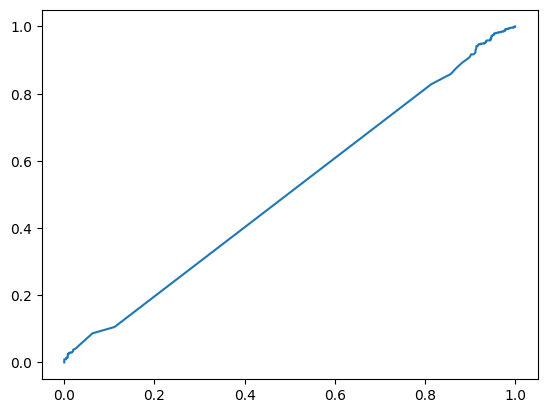

In [ ]:
# lbtope # here
from sklearn.metrics import roc_curve, auc


y_test_subset = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras = y_pred_keras[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)



plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pred = model.predict(samples_to_predict_1)

# Use the same test data for predictions and ground truth
truth = y_test[:len(samples_to_predict_1)] # Using corresponding portion of y_test

threshold = 0.359

# Reshape pred to be 1-dimensional before passing it to roc_auc_score
roc_auc = roc_auc_score(pred.ravel() > threshold, truth)
print(f"ROC AUC: {roc_auc}")

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pred = model.predict(samples_to_predict)

# Use the same test data for predictions and ground truth
truth = y_test[:len(samples_to_predict)] # Using corresponding portion of y_test

threshold = 0.359

# Reshape pred to be 1-dimensional before passing it to roc_auc_score
roc_auc = roc_auc_score(pred.ravel() > threshold, truth)
print(f"ROC AUC: {roc_auc}")

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


pred = model.predict(samples_to_predict)

# Use the same test data for predictions and ground truth
truth = y_test[:len(samples_to_predict_1)] # Using corresponding portion of y_test

threshold = 0.359

# Reshape pred to be 1-dimensional before passing it to roc_auc_score
roc_auc = roc_auc_score(pred.ravel() > threshold, truth)
print(f"ROC AUC: {roc_auc}")

In [ ]:
import numpy as np
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, -1)
truncated_samples = samples_to_predict[:, :, :138] # Select the first 13

predictions = model.predict(truncated_samples)
print(predictions)


In [ ]:
samples_to_predict = np.array(lab_5)
print(samples_to_predict.shape)

In [ ]:
print(use_samples)

In [ ]:
model.summary


In [ ]:
import numpy as np
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, -1)
truncated_samples = samples_to_predict[:, :, :138] # Select the first 13

predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
lab_3.shape

In [ ]:
lab_3.shape
import numpy as np
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, -1)
truncated_samples = samples_to_predict[:, :, :138] # Select the first 13

predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
import numpy as np
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, -1)
truncated_samples = samples_to_predict[:, :, :138] # Select the first 13

predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
import numpy as np

# Assuming your model expects an input shape of (batch_size, timesteps, features)
# and features should be 138
# Reshape the data to match the expected input shape of the model
samples_to_predict = np.array(lab_131) # Assuming lab_5 contains your raw data
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], samples_to_predict.shape[1], samples_to_predict.shape[2])
# Select all features if they are 138 or less if needed
##
truncated_samples = samples_to_predict[:, :, :samples_to_predict.shape[2]]
# Make predictions using the reshaped data
predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
# lab_132 Netbce use chunk
import numpy as np

# Assuming your model expects an input shape of (batch_size, timesteps, features)
# and features should be 138
# Reshape the data to match the expected input shape of the model
samples_to_predict = np.array(lab_132) # Assuming lab_5 contains your raw data
# Check the shape of your raw data
print("Raw data shape:", samples_to_predict.shape)
# Reshape is not needed if your data already has the correct shape
# samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], samples_to_predict.shape[1], samples_to_predict.shape[2])
# Check the expected input shape of your model
# print("Model input shape:", model.input_shape)
# Instead of truncating, consider padding or repeating features to match 138
num_features = samples_to_predict.shape[2]
if num_features < 138:
  # Repeat features to reach 138 or use padding if appropriate
  repeat_count = 138 // num_features
  remainder = 138 % num_features

  repeated_features = np.repeat(samples_to_predict, repeat_count, axis=2)

  padded_features = np.pad(repeated_features, ((0, 0), (0, 0), (0, remainder)), 'constant')
  truncated_samples = padded_features
  # OR, you may use padding if you need to keep the original information
  # truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - num_features)), 'constant')
else:
  truncated_samples = samples_to_predict[:, :, :138]

# Make predictions using the reshaped data
predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
print(roc_auc)

In [ ]:
###try2
from sklearn.metrics import roc_curve, auc


##lbtope
y_test_subset = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras = y_pred_keras[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)






# netbce use 0.50 cutoff
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_1 = y_test[:truncated_samples_12.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_1 = model.predict(truncated_samples_12)
# Take the mean or the last prediction over the timesteps
y_pred_keras_1 = y_pred_keras_1[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_1, tpr_keras_1, thresholds_keras = roc_curve(y_test_subset_1, y_pred_keras_1)  # Use the subset
roc_auc_1 = auc(fpr_keras_1, tpr_keras_1)
print(roc_auc_1)


from sklearn.metrics import roc_curve, auc
##DV2 chunk DV2use.csv
# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_5 = y_test[:truncated_samples_2.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_5 = model.predict(truncated_samples_2)
# Take the mean or the last prediction over the timesteps
y_pred_keras_5 = y_pred_keras_5[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_5, tpr_keras_5, thresholds_keras = roc_curve(y_test_subset_5, y_pred_keras_5)  # Use the subset
roc_auc_5 = auc(fpr_keras_5, tpr_keras_5)
print(roc_auc_5)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras_1 = auc(fpr_keras_1, tpr_keras_1)
#auc_keras_3 = auc(fpr_keras_3, tpr_keras_3)
#auc_keras_4 = auc(fpr_keras_4, tpr_keras_4)
auc_keras_5 = auc(fpr_keras_5, tpr_keras_5)
#auc_keras_31 = auc(fpr_keras_31, tpr_keras_31)
from sklearn.metrics import roc_curve, auc
y_test_subset_3 = y_test[:X_test_reshape.shape[0]]  # Select the first 188 labels




# model Pro-I-gen
# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_3 = model.predict(X_test_reshape)
# Take the mean or the last prediction over the timesteps
y_pred_keras_3 = y_pred_keras_3[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_3, tpr_keras_3, thresholds_keras_3 = roc_curve(y_test_subset_3, y_pred_keras_3)  # Use the subset
roc_auc_3 = auc(fpr_keras_3, tpr_keras_3)
print(roc_auc_3)
auc_keras_3 = auc(fpr_keras_3, tpr_keras_3)












#####
fpr_keras, tpr_keras, _ = roc_curve(y_test_subset, y_pred_keras)
## plt.plot([0, 1,], ['No Skill', 'Nou Skill'], linestyle='--', label='No Skill')
plt.plot([0, 1], [0, 1], 'k--')
#plt.plot(fpr_keras, tpr_keras,linestyle='--', label='No Skill')
#plt.plot(fpr_keras_1, tpr_keras_1, linestyle='--', label='NetBCE_cf (area = {:.3f})'.format(auc_keras_1), color='red')
plt.plot(fpr_keras, tpr_keras, linestyle='--', marker='.', label='Lbtope (area = {:.3f})'.format(auc_keras), color='red')
plt.plot(fpr_keras_3, tpr_keras_3, linestyle='--', marker='.', label='Pro-I-Gen (area = {:.3f})'.format(auc_keras_3), color='blue')
plt.plot(fpr_keras_1, tpr_keras_1, linestyle='--', marker='.', label='NetBCE (area = {:.3f})'.format(auc_keras_1), color='purple')
#plt.plot(fpr_keras_c, tpr_keras_c, linestyle='--', marker='.', label='UniprotKB (area = {:.3f})'.format(auc_keras_c), color='cyan')
plt.plot(fpr_keras_5, tpr_keras_5, linestyle='--', marker='.', label='DV2 (area = {:.3f})'.format(auc_keras_5), color='magenta')
plt.xlabel('FPR')
plt.ylabel('TPR')
# show the legend
plt.legend()
# show the plot
plt.show()






In [ ]:
y_test_subset_3 = y_test[:truncated_samples_3.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_3 = model.predict(truncated_samples_3)
# Take the mean or the last prediction over the timesteps
y_pred_keras_3 = y_pred_keras_3[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_3, tpr_keras_3, thresholds_keras = roc_curve(y_test_subset_3, y_pred_keras_3)  # Use the subset
roc_auc_3 = auc(fpr_keras_3, tpr_keras_3)
print(roc_auc_3)

In [ ]:
# netbce use chunk
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_1 = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_1 = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras_1 = y_pred_keras_1[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test_subset_1, y_pred_keras_1)  # Use the subset
roc_auc = auc(fpr_keras_1, tpr_keras_1)
print(roc_auc)

plt.plot(fpr_keras_1, tpr_keras_1, linestyle='--', label='Nopp Skill')
plt.plot(fpr_keras, tpr_keras, marker='.', add = True,  label='Logistic')


plot(perf2,colorize = FALSE, add = TRUE,  type="l", lty=3,col="black")

y_test_subset_1 = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_1 = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras_1 = y_pred_keras_1[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test_subset_1, y_pred_keras_1)  # Use the subset
roc_auc_1 = auc(fpr_keras_1, tpr_keras_1)
print(roc_auc_1)
plt.plot(fpr_keras_1, tpr_keras_1, linestyle='--', label='Nopp Skill')
plt.plot(fpr_keras, tpr_keras, marker='.', label='Logistic')

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_1 = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_1 = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras_1 = y_pred_keras_1[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test_subset_1, y_pred_keras_1)  # Use the subset
roc_auc = auc(fpr_keras_1, tpr_keras_1)
print(roc_auc)

plt.plot(fpr_keras_1, tpr_keras_1, linestyle='--', label='Nopp Skill')
# Removing 'add = True' as it's not a valid argument for plt.plot()
plt.plot(fpr_keras, tpr_keras, marker='.',linestyle='--', label='Logistic')

# If you intend to add to an existing plot, ensure it's already created before this line
# For example, you might have a previous plt.figure() or plt.subplot() call


In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras = y_pred_keras[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)

In [ ]:
# lab_131 Netbce
import numpy as np

# Assuming your model expects an input shape of (batch_size, timesteps, features)
# and features should be 138
# Reshape the data to match the expected input shape of the model
samples_to_predict = np.array(lab_131) # Assuming lab_5 contains your raw data
# Check the shape of your raw data
print("Raw data shape:", samples_to_predict.shape)
# Reshape is not needed if your data already has the correct shape
# samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], samples_to_predict.shape[1], samples_to_predict.shape[2])
# Check the expected input shape of your model
# print("Model input shape:", model.input_shape)
# Instead of truncating, consider padding or repeating features to match 138
num_features = samples_to_predict.shape[2]
if num_features < 138:
  # Repeat features to reach 138 or use padding if appropriate
  repeat_count = 138 // num_features
  remainder = 138 % num_features

  repeated_features = np.repeat(samples_to_predict, repeat_count, axis=2)

  padded_features = np.pad(repeated_features, ((0, 0), (0, 0), (0, remainder)), 'constant')
  truncated_samples = padded_features
  # OR, you may use padding if you need to keep the original information
  # truncated_samples = np.pad(samples_to_predict, ((0, 0), (0, 0), (0, 138 - num_features)), 'constant')
else:
  truncated_samples = samples_to_predict[:, :, :138]

# Make predictions using the reshaped data
predictions = model.predict(truncated_samples)
print(predictions)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(truncated_samples) > 0.759
#pred = model.predict(test_y) > 0.75
truth = y_test

# diff = np.abs(truth - (pred > 0.3))

# np.unique(diff, return_counts=True)

threshold = 0.659
#print(accuracy_score((test_y, y_pred)))

roc_auc = roc_auc_score(pred > threshold, truth)

In [ ]:
# netbce
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset = y_test[:truncated_samples.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras = model.predict(truncated_samples)
# Take the mean or the last prediction over the timesteps
y_pred_keras = y_pred_keras[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)

In [ ]:
samples_to_predict.shape[2]

In [ ]:

from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset = y_test[:samples_to_predict.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve

y_pred_keras = model.predict(samples_to_predict).ravel()


fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)

In [ ]:
# file chunk_DV2 _use

import numpy as np

# Assuming your model expects an input shape of (batch_size, timesteps, features)
# and features should be 138
# Reshape the data to match the expected input shape of the model
samples_to_predict = np.array(lab_12) # Assuming lab_5 contains your raw data
# The problem was in this reshape
# samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, samples_to_predict.shape[1])
# We need to keep the total element count the same

# Corrected reshape, assuming you want the timesteps to be 1:
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], 1, samples_to_predict.shape[1] * samples_to_predict.shape[2])

# If you want the feature dimension to be 138, and if your current features are 30 (10x3):
# you'll have to consider methods like zero padding if your features are less than 138
# or feature selection/dimensionality reduction if you have more features than 138
num_features_needed = 138
num_features_current = samples_to_predict.shape[2]

if num_features_current < num_features_needed:
  # Pad with zeros to reach desired number of features
  padding_shape = (samples_to_predict.shape[0], 1, num_features_needed - num_features_current)
  padding = np.zeros(padding_shape)
  samples_to_predict = np.concatenate([samples_to_predict, padding], axis=2)
elif num_features_current > num_features_needed:
  # Consider feature selection or dimensionality reduction techniques to reduce
  # the number of features to 138.
  # For a basic example (selecting the first 138 features):
  samples_to_predict = samples_to_predict[:, :, :num_features_needed]


# Select all features if they are 138 or less if needed
truncated_samples_2 = samples_to_predict[:, :, :min(138,samples_to_predict.shape[2])]

truncated_samples_2.shape
# Make predictions using the reshaped data
pred = model.predict(truncated_samples_2)
print(pred)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[[0.19084635]]

 [[0.1946921 ]]

 [[0.19954893]]

 [[0.20078151]]

 [[0.21604915]]

 [[0.19404763]]

 [[0.20218465]]

 [[0.21627615]]

 [[0.22858272]]

 [[0.19884683]]

 [[0.19474325]]

 [[0.21995895]]

 [[0.18895392]]

 [[0.20455526]]

 [[0.19406657]]

 [[0.20835808]]

 [[0.19731359]]

 [[0.19181608]]

 [[0.1959732 ]]

 [[0.19167651]]

 [[0.25965548]]

 [[0.20556287]]

 [[0.22095013]]

 [[0.20049366]]

 [[0.21907227]]

 [[0.20812769]]

 [[0.23716095]]

 [[0.22347045]]

 [[0.2356699 ]]

 [[0.23713009]]

 [[0.2103474 ]]

 [[0.20875823]]

 [[0.19306745]]

 [[0.19953875]]

 [[0.19565484]]

 [[0.1997558 ]]

 [[0.20173411]]

 [[0.19519494]]

 [[0.2305109 ]]

 [[0.18738227]]

 [[0.20379218]]

 [[0.18443726]]

 [[0.1881022 ]]

 [[0.18538956]]

 [[0.18615526]]

 [[0.18435751]]

 [[0.18867022]]

 [[0.18814893]]

 [[0.19209352]]

 [[0.1985042 ]]

 [[0.19095239]]

 [[0.21374328]]

 [[0.20449823]]

 [[0.20862077]]

 [[0.20010796]]

 [[0.21789373]]

 [[0.20477

In [ ]:
# AUC values for DV2_use
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_5 = y_test[:truncated_samples_2.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve

y_pred_keras_5 = model.predict(truncated_samples_2).ravel()

fpr_keras_5, tpr_keras_5, thresholds_keras = roc_curve(y_test_subset_5, y_pred_keras_5)  # Use the subset
roc_auc_5 = auc(fpr_keras_5, tpr_keras_5)
print(roc_auc_5)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
0.46697632264642575


In [ ]:
# AUC values for DV2
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset = y_test[:samples_to_predict_1.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve

y_pred_keras = model.predict(samples_to_predict_1).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)

In [ ]:
samples_to_predict.shape[2]

In [ ]:
samples_to_predict_2.shape

In [ ]:
# AUC values for LBtope
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_1 = y_test[:samples_to_predict_2.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve

y_pred_keras_1 = model.predict(samples_to_predict_2).ravel()

fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test_subset_1, y_pred_keras_1)  # Use the subset
roc_auc = auc(fpr_keras_1, tpr_keras_1)
print(roc_auc)

In [ ]:
##try lbtope
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset_1 = y_test[:truncated_samples_2.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve
# Reshape predictions to match y_test_subset
y_pred_keras_1 = model.predict(truncated_samples_2)
# Take the mean or the last prediction over the timesteps
y_pred_keras_1 = y_pred_keras_1[:, -1].ravel() # Assuming you want the last timestep's prediction

fpr_keras_1, tpr_keras_1, thresholds_keras = roc_curve(y_test_subset_1, y_pred_keras_1)  # Use the subset
roc_auc_1 = auc(fpr_keras_1, tpr_keras_1)
print(roc_auc_1)








In [ ]:
# AUC values for chunk_DV2 lab_3
from sklearn.metrics import roc_curve, auc

# Assuming y_test corresponds to X_test, and you want to predict on a subset:
# Select the corresponding y_test values for the samples you're predicting on
y_test_subset = y_test[:samples_to_predict.shape[0]]  # Select the first 188 labels

# Now predict and calculate ROC curve

y_pred_keras = model.predict(samples_to_predict).ravel()

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test_subset, y_pred_keras)  # Use the subset
roc_auc = auc(fpr_keras, tpr_keras)
print(roc_auc)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test) > 0.359
#pred = model.predict(test_y) > 0.75
truth = y_test

# diff = np.abs(truth - (pred > 0.3))

# np.unique(diff, return_counts=True)

threshold = 0.659
#print(accuracy_score((test_y, y_pred)))
accuracy = accuracy_score(pred > threshold, truth)
precision = precision_score(pred, truth)
recall = recall_score(pred > threshold, truth)
f1 = f1_score(pred > threshold, truth)
roc_auc = roc_auc_score(pred > threshold, truth)

In [ ]:
# code working lab_5 also required

import numpy as np

# Instead of appending to the numpy array, create a list to store the samples
# and then convert it to a numpy array later for prediction.
samples_to_predict_list = []
for i, sample in enumerate(use_samples):
    # ... (Your other code) ...

    # Add sample to the list
    samples_to_predict_list.append(X_test[i])

# Convert the list to a NumPy array for prediction
samples_to_predict_list = np.array(samples_to_predict_list)

predictions = model.predict(samples_to_predict_list)
print(predictions)


In [ ]:
# code working lab_5 also required

import numpy as np

# Instead of appending to the numpy array, create a list to store the samples
# and then convert it to a numpy array later for prediction.
samples_to_predict_list = []
for i, sample in enumerate(use_samples):
    # ... (Your other code) ...

    # Add sample to the list
    samples_to_predict_list.append(X_test[i])

# Convert the list to a NumPy array for prediction
samples_to_predict_list = np.array(samples_to_predict)

predictions = model.predict(samples_to_predict_list)
print(predictions)











In [ ]:
import numpy as np

unique_classes, class_counts = np.unique(truth, return_counts=True)
print("Unique Classes:", unique_classes)
print("Class Counts:", class_counts)

In [ ]:
samples_to_predict

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(samples_to_predict) > 0.359
#pred = model.predict(test_y) > 0.75
truth = y_test

# diff = np.abs(truth - (pred > 0.3))
truth = truth.to_numpy().astype(int)   # Assuming 'truth' can be represented as integers
# np.unique(diff, return_counts=True)

threshold = 0.659
# Reshape pred_binary to be 1-dimensional
pred_binary = (pred > threshold).astype(int).reshape(-1)
accuracy = accuracy_score(pred_binary, truth)  # Use pred_binary instead of pred > threshold
precision = precision_score(pred_binary, truth)  # Use pred_binary here as well
recall = recall_score(pred_binary, truth)      # Use pred_binary here as well
f1 = f1_score(pred_binary, truth)            # Use pred_binary here as well
roc_auc = roc_auc_score(pred_binary, truth)      # Use pred_binary here as well


print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}, ROC AUC: {roc_auc}")


#print(accuracy_score((test_y, y_pred)))
accuracy = accuracy_score(pred > threshold, truth)
precision = precision_score(pred, truth)
recall = recall_score(pred > threshold, truth)
f1 = f1_score(pred > threshold, truth)
roc_auc = roc_auc_score(pred > threshold, truth)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}, ROC AUC: {roc_auc}")


####

accuracy_score(pred > threshold, truth), precision_score(pred, truth), recall_score(pred > threshold, truth), \
f1_score(pred > threshold, truth), roc_auc_score(pred > threshold, truth)


In [ ]:
classes = np.argmax(predictions, axis = 1)
print(classes)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test) > 0.359
#pred = model.predict(test_y) > 0.75
truth = y_test

# diff = np.abs(truth - (pred > 0.3))

# np.unique(diff, return_counts=True)

threshold = 0.659
#print(accuracy_score((test_y, y_pred)))
accuracy = accuracy_score(pred > threshold, truth)
precision = precision_score(pred, truth)
recall = recall_score(pred > threshold, truth)
f1 = f1_score(pred > threshold, truth)
roc_auc = roc_auc_score(pred > threshold, truth)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}, ROC AUC: {roc_auc}")


####

accuracy_score(pred > threshold, truth), precision_score(pred, truth), recall_score(pred > threshold, truth), \
f1_score(pred > threshold, truth), roc_auc_score(pred > threshold, truth)



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(X_test) > 0.469
#pred = model.predict(test_y) > 0.75
truth = y_test

# diff = np.abs(truth - (pred > 0.3))

# np.unique(diff, return_counts=True)

threshold = 0.659
#print(accuracy_score((test_y, y_pred)))
accuracy = accuracy_score(pred > threshold, truth)
precision = precision_score(pred, truth)
recall = recall_score(pred > threshold, truth)
f1 = f1_score(pred > threshold, truth)
roc_auc = roc_auc_score(pred > threshold, truth)

print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1-score: {f1}, ROC AUC: {roc_auc}")


####

accuracy_score(pred > threshold, truth), precision_score(pred, truth), recall_score(pred > threshold, truth), \
f1_score(pred > threshold, truth), roc_auc_score(pred > threshold, truth)

In [ ]:
pred <- prediction( predicted1, response )
pred2 <- prediction(predicted2, response)
perf <- performance( pred, "tpr", "fpr" )
perf2 <- performance(pred2, "tpr", "fpr")
plot( perf, colorize = FALSE,  type="l",col="blue")
abline(a=0,b=1)
plot(perf2,colorize = FALSE, add = TRUE,  type="l", lty=3,col="black")

In [ ]:

from keras.utils import pad_sequences
bab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
lab_1 = pad_sequences(lab, padding='post', value=0, dtype='float32') # Pad sequences
lab_1 = np.array(lab_1)

In [ ]:
# current

filtered_dataset_X = encode(filtered_df['Sequence'].tolist())
print(filtered_dataset_X)

# Pad sequences to the expected length (138) with a single feature dimension
lab_4 = pad_sequences(filtered_dataset_X, padding='post', value=0, dtype='float32', maxlen=138)
lab_4 = np.array(lab_4)
print(lab_4)

In [ ]:
model.predict_on_batch(df2)

In [ ]:
all_indices = list(range(lab_1.shape[0])) # Use the first dimension of the dataset for indices
#df2.drop(['SEQ'] ,axis=1, inplace=True)
#all_indices = list(range(df2.shape[0]))
train_ind, test_ind = train_test_split(all_indices, test_size=0.0,shuffle=True)
X_train = X[train_ind]
X_test = X[test_ind]
y_train = y[train_ind]
y_test = y[test_ind]
# Correctly index the dataset along the first axis
#X_train = X.iloc[train_ind]
#X_train = X[train_ind, :, :]  # Select samples using train_ind along the first axis
#X_test = X.iloc[test_ind] #Use iloc to select rows from X using test_ind
y_train = y.iloc[train_ind] #Use iloc to select rows from y using train_ind
y_test = y.iloc[test_ind] #Use iloc to select rows from y using test_ind

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers


model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=32, activation='relu', input_shape=(X_train.shape[1],)), # Use a Dense layer for tabular data
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(units=12, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dense(units=1,activation='sigmoid'),
])

model.trainable = False
assert model.trainable == False  # All layers in `model` are now frozen
assert model.layers[0].trainable == False  # `trainable` is propagated recursivel

In [ ]:
prediction = model.predict(df2)
print(prediction)

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'encode' function is defined elsewhere and works correctly


# Preprocess df2 before prediction
# 1. Extract the 'Sequence' column and encode it
encoded_sequences = encode(df2[0].tolist())

# 2. Pad the encoded sequences to match the expected input shape (138)
padded_sequences = pad_sequences(encoded_sequences, padding='post', value=0, dtype='float32', maxlen=138)

# 3. Convert the padded sequences to a NumPy array
input_data = np.array(padded_sequences)

# 4. Now, make the prediction using the preprocessed data
prediction = model.predict(input_data)
print(prediction)

In [ ]:
filtered_dataset_X = filtered_df.reshape(-1, 10, 3)

In [ ]:



# e.g., to use the EarlyStopping callback:
from keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=3)

antigens = antigens.reshape(antigens.shape[0], antigens.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])
lab_4 = lab_4.reshape(lab_4.shape[0], lab_4.shape[1])  #a
# Pass the callback to the fit method
model.compile(optimizer="adam",
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(antigens, epochs=20, callbacks=[early_stopping], validation_data=(X_test, y_test))

# If you don't want to use any callbacks, pass an empty list:
# model.fit(antigens, epochs=20, callbacks=[], validation_data=your_validation_data)




prediction = model.predict(np.array(lab_4))
print(prediction)

In [ ]:
seq_predictions=model.predict(filtered_dataset_1)
print('Outputs shape')
print(seq_predictions.shape) # prints (n,1) but  need (n,)
seq_predictions=np.transpose(seq_predictions)[0]  # transformation to get (n,)
print(seq_predictions.shape)  # now the shape is (n,)
# Applying transformation to get binary values predictions with 0.5 as thresold
seq_predictions = list(map(lambda x: 0 if x<0.5 else 1, seq_predictions))

In [ ]:
prediction = model.predict(X[-N:])
X.append(prediction)

In [ ]:
hidden_layer = model.layers[4].output
hidden_layer = hidden_layer.eval(session=tf.Session())
print(hidden_layer)

In [ ]:
import numpy as np

filtered_dataset_X = encode(filtered_df['Sequence'].values)
antigens = np.array(filtered_dataset_X)

#samples_to_predict = np.array(antigens)
predictions = model.predict(antigens)
print(predictions)
print(antigens[0])
print(antigens)

Y_pred = model.predict(antigens)
Y_pred_P = (Y_pred > 0.759)
#print(Y_pred_P)
print(accuracy_score,(test_y, Y_pred))
#print(Y_pred_P)


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

filtered_dataset_X = encode(filtered_df['Sequence'])
antigens = np.array(filtered_dataset_X)

# Reshape the antigens array to have the expected shape (num_samples, 14772)
num_samples = antigens.shape[0]

# Check the output shape of the 'encode' function
print("Shape of encoded data:", antigens.shape)

# Reshape or pad the data to match the expected input shape for the model
# If the shape is not (num_samples, 14772), you'll need to adjust the 'encode' function
# or the data preprocessing steps to produce the correct output shape.

# Assuming your encoded data has shape (num_samples, 10, 3) and you need to flatten it:
antigens = antigens.reshape(num_samples, -1)  # Flatten the last two dimensions

# If you still need to pad/truncate to 14772 features:
antigens = pad_sequences(antigens, maxlen=14772, padding='post', truncating='post', value=0.0)

# Proceed with predictions
predictions = model.predict(antigens)
print(predictions)

In [ ]:
# roc auc netbce chunk
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Y_pred = model.predict(truncated_samples)
Y_pred_P = (Y_pred > 0.359)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)

truth = y_test[:len(Y_pred)]
# Convert truth to a NumPy array and ensure it's 1-dimensional
truth = truth.values.ravel()

pred = Y_pred[:, -1, 0]  # Select the last timestep prediction and flatten

# Check for class imbalance in truth
unique_classes = np.unique(truth)
if 0 not in unique_classes or 1 not in unique_classes:
    print("Warning: Both classes (0 and 1) are not present in y_true. ROC AUC score cannot be calculated.")
else:
    # Calculate and print ROC AUC score if both classes are present
    roc_auc = roc_auc_score(truth, pred > threshold)  # Corrected order of arguments
    print("ROC AUC Score:", roc_auc)


In [ ]:
### chunk.csv uniprot wget  works


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Y_pred = model.predict(truncated_samples_c)
Y_pred_P = (Y_pred > 0.259)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)

truth = y_test[:len(Y_pred)]
# Convert truth to a NumPy array and ensure it's 1-dimensional
truth = truth.values.ravel()

pred = Y_pred[:, -1, 0]  # Select the last timestep prediction and flatten

# Check for class imbalance in truth
unique_classes = np.unique(truth)
if 0 not in unique_classes or 1 not in unique_classes:
    print("Warning: Both classes (0 and 1) are not present in y_true. ROC AUC score cannot be calculated.")
else:
    # Calculate and print ROC AUC score if both classes are present
    roc_auc = roc_auc_score(truth, pred > threshold)  # Corrected order of arguments
    print("ROC AUC Score:", roc_auc)
    print(Y_pred_P)

In [ ]:
from sklearn.metrics import confusion_matrix

#cm = confusion_matrix(y_test, Y_pred_P)



print("Shape of y_test:", y_test.shape)
print("Shape of Y_pred_P:", Y_pred_P.shape)

# 2.  Since 'Y_pred_P' likely contains predictions for a subset of the data,
# we'll adjust 'y_test' to match the number of samples in 'Y_pred_P':
y_test_subset = y_test[:Y_pred_P.shape[0]]  # Select the first 697 samples of y_test


# If you need to flatten Y_pred_P you can do:
Y_pred_P = Y_pred_P.flatten()

import seaborn as sns
import matplotlib.pyplot as plt

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Epitope','Non-epitope']); ax.yaxis.set_ticklabels(['Non-epitope', 'Epitope']);
# 3. Now, calculate the confusion matrix with the adjusted 'y_test':


In [ ]:
model.summary()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Y_pred = model.predict(samples_to_predict)
Y_pred_P = (Y_pred > 0.459)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)

truth = y_test[:len(Y_pred)]
roc_auc_score(pred > threshold, truth)
roc_auc_score


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Y_pred = model.predict(truncated_samples_c)
Y_pred_P = (Y_pred > 0.459)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)


threshold =0.2
truth = y_test_subset[:len(Y_pred)]
roc_auc_score(predictions > threshold, truth)
roc_auc_score





In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Y_pred = model.predict(samples_to_predict_c)
Y_pred_P = (Y_pred > 0.259)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)

truth = y_test[:len(Y_pred)]
# Reshape pred (Y_pred or Y_pred_P) to 1D or 2D before using it in roc_auc_score
pred_reshaped = pred.reshape(-1)  # Reshape to 1D
# Or: pred_reshaped = pred.reshape(pred.shape[0], -1)  # Reshape to 2D if necessary
threshold = 0.259
truth
roc_auc_score(pred_reshaped > threshold, truth)
roc_auc_score

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Y_pred = model.predict(samples_to_predict_c)
Y_pred_P = (Y_pred > 0.259)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)

truth = y_test[:len(Y_pred)]
# Reshape pred (Y_pred or Y_pred_P) to 1D or 2D before using it in roc_auc_score
pred_reshaped = pred.reshape(-1)  # Reshape to 1D
# Or: pred_reshaped = pred.reshape(pred.shape[0], -1)  # Reshape to 2D if necessary
threshold = 0.259
truth
roc_auc_score(pred_reshaped > threshold, truth)
roc_auc_score


In [ ]:
Y_pred = model.predict(antigens)
Y_pred_P = (Y_pred > 0.759)
#print(Y_pred_P)
print(accuracy_score,(y_test, Y_pred))
#print(Y_pred_P)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score,(y_test,Y_pred))
#print('Recall: ',metrics.recall_score(test_y, Y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, Y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, Y_pred, zero_division=1))

In [ ]:
# Assuming 'filtered_df' contains the filtered data used for prediction
# and 'y_test_original' is the original ground truth labels

# 1. Get indices of the filtered data in the original dataset
filtered_indices = filtered_df.index

# 2. Filter the original ground truth labels to match the filtered data
y_test = y_test_original[filtered_indices]

# 3. Now, y_test and Y_pred should have the same shape
# Proceed with calculating metrics
print(accuracy_score,(y_test,Y_pred))
print('Precision:',metrics.precision_score(y_test, Y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, Y_pred, zero_division=1))

In [ ]:
# 1. Get indices of the filtered data in the original dataset
filtered_indices = filtered_df.index

# 2. Instead of using 'y_test_original', use your existing 'y_test'
#    and select elements based on 'filtered_indices'
#    Assuming 'y_test' corresponds to the original unfiltered data
y_test_filtered = y_test[filtered_indices]  # Create a new variable

# 3. Now, y_test_filtered and Y_pred should have the same shape
# Proceed with calculating metrics
print(accuracy_score,(y_test_filtered,Y_pred))  # Use the filtered y_test
print('Precision:',metrics.precision_score(y_test_filtered, Y_pred, zero_division=1)) # Use the filtered y_test
print('CL Report:',metrics.classification_report(y_test_filtered, Y_pred, zero_division=1)) # Use the filtered y_test

In [ ]:
filtered_dataset_X = encode(filtered_df['Sequence'].values)
antigens = np.array(filtered_dataset_X)

# Reshape the antigens array to have the expected shape (num_samples, 14772)
num_samples = antigens.shape[0]
antigens = antigens.reshape(num_samples, -1)  # -1 infers the remaining dimension

#samples_to_predict = np.array(antigens)
predictions = model.predict(antigens)
print(predictions)
print(antigens[0])
print(antigens)

Y_pred = model.predict(antigens)
Y_pred_P = (Y_pred > 0.759)
#print(Y_pred_P)
print(accuracy_score,(test_y, Y_pred))
#print(Y_pred_P)

In [ ]:
import numpy as np

# Reshape the data to match the expected input shape of the model
filtered_dataset_X = encode(filtered_df['Sequence'].values)
# Assuming `filtered_dataset_X` is a list of lists of lists
# First, flatten the inner lists:
filtered_dataset_X = [[item for sublist in inner_list for item in sublist] for inner_list in filtered_dataset_X]
# Then, pad or truncate to ensure each sample has 14772 features
filtered_dataset_X = np.array([np.pad(x, (0, 14772 - len(x)), 'constant') if len(x) < 14772 else x[:14772] for x in filtered_dataset_X])


antigens = filtered_dataset_X

#samples_to_predict = np.array(antigens)
predictions = model.predict(antigens)
print(predictions)
print(antigens[0])
print(antigens)
print(antigens[10])
Y_pred = model.predict(antigens)
Y_pred_P = (Y_pred > 0.659)
#print(Y_pred_P)
print(accuracy_score,(test_y, Y_pred))
#print(Y_pred_P)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

pred = model.predict(samples_to_predict) > 0.469
#pred = model.predict(test_y) > 0.75
# truth = y_test

truth = y_test[:len(pred)]

# diff = np.abs(truth - (pred > 0.3))

# np.unique(diff, return_counts=True)

threshold = 0.459
#print(accuracy_score((test_y, y_pred)))
accuracy_score(pred > threshold, truth), precision_score(pred, truth), recall_score(pred > threshold, truth), \
f1_score(pred > threshold, truth), roc_auc_score(pred > threshold, truth),



In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(accuracy_score,(y_test,Y_pred))
#print('Recall: ',metrics.recall_score(test_y, Y_pred, zero_division=1))
print('Precision:',metrics.precision_score(y_test, Y_pred, zero_division=1))
print('CL Report:',metrics.classification_report(y_test, Y_pred, zero_division=1))

In [ ]:
from keras.utils import pad_sequences
lab = encode(X['SEQ'].tolist()) # Convert the 'SEQ' column to a list before passing to encode
lab_1 = pad_sequences(lab, padding='post', value=0, dtype='float32') # Pad sequences
lab_1 = np.array(lab_1)
# Reshape the lab array

In [ ]:
def import_model(main_dir):
    models = []
    json_f = open(main_dir + "/model_net.json", 'r')
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights((main_dir + "/model_"+str(i)+".h5"))
        models.append(loaded_model)
    return models

In [ ]:
def scoring(models, data):
    import numpy as np
    '''
    Use an ensemble of models to yield prediction scores for the data
    Args:
        1. models: Model ensemble
        2. data: Data to be predicted
    Return values:
        1. probas_: Prediction scores
    '''
    probas_ = [np.transpose(model_net.predict(data))[0] for model in models]
    probas_ = [np.mean(scores) for scores in zip(*probas_)]
    return probas_

In [ ]:
!wget https://github.com/bsml320/NetBCE/tree/main/models

In [ ]:
import numpy as np
from tensorflow.keras.models import model_from_json

# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_5)
# Assuming you want to flatten the last two dimensions (10, 3) into a single dimension (30)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)

import tensorflow as tf
model_net = tf.keras.layers.TFSMLayer('model.json')
# Now predict using the reshaped data
predictions = model_net.predict(samples_to_predict)
print(predictions)

In [ ]:
!wget https://github.com/bsml320/NetBCE/blob/main/models/model_1.h5

import keras
!file model_1.h5
model = keras.models.load_model('model_1.h5')


import keras
try:
    model = keras.models.load_model('model_1.h5')
except OSError:
    print("Error loading model file. Check if the file exists and is not corrupted.")
    # Add any necessary error handling logic here


In [ ]:

import os

def import_model(main_dir):
    """
    Imports an ensemble of models from a directory.

    Args:
        main_dir (str): The path to the directory containing the models.

    Returns:
        list: A list of loaded Keras models.
    """
    models = []
    # Download and extract the model files if the directory doesn't exist
    if not os.path.exists(main_dir):
        # Download the zip file
        url = '!wget https://github.com/bsml320/NetBCE/tree/main/models'
        wget.download(url)

        # Extract the zip file (ensure you have the necessary libraries for zip file extraction)
        !unzip main.zip

        # Rename the extracted directory to match the expected path
        os.rename('NetBCE-main', main_dir)

    json_f = open(os.path.join(main_dir, "model_net.json"), 'r')
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights(os.path.join(main_dir, "model_"+str(i)+".h5"))
        models.append(loaded_model)
    return models

In [ ]:
#import os
# import wget

def import_model(main_dir):
    """
    Imports an ensemble of models from a directory.

    Args:
        main_dir (str): The path to the directory containing the models.

    Returns:
        list: A list of loaded Keras models.
    """
    models = []
    # Download and extract the model files if the directory doesn't exist
    if not os.path.exists(main_dir):
        # Download the zip file, ensure to download a zip archive
        url = 'https://github.com/bsml320/NetBCE/archive/refs/heads/main.zip'
        wget.download(url)

        # Extract the zip file (ensure you have the necessary libraries for zip file extraction)
        !unzip main.zip #Unzips into a directory named 'NetBCE-main'

        # Rename the extracted directory to match the expected path
        os.rename('NetBCE-main', main_dir) # Renames it to 'models'

    # Now 'models' is a directory containing the model files.
    json_f = open(os.path.join(, "model_net.json"), 'r')
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights(os.path.join(main_dir, "model_"+str(i)+".h5"))
        models.append(loaded_model)
    return models


from tensorflow.keras.models import model_from_json

# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_5)
# Assuming you want to flatten the last two dimensions (10, 3) into a single dimension (30)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)
# Call the import_model function to load the models
models = import_model('models') # Call the function and assign the result to 'models'
# Now predict using the reshaped data
predictions = models[0].predict(samples_to_predict)
predictions = models.predict(samples_to_predict)
print(predictions)

  model no error

In [ ]:
! pip3 install wget

In [ ]:
from tensorflow.keras.models import model_from_json
import numpy as np
import wget

def import_model(main_dir):
    """
    Imports an ensemble of models from a directory.

    Args:
        main_dir (str): The path to the directory containing the models.

    Returns:
        list: A list of loaded Keras models.
    """
    models = []
    # Download and extract the model files if the directory doesn't exist
    if not os.path.exists(main_dir):
        # Download the zip file, ensure to download a zip archive
        url = 'https://github.com/bsml320/NetBCE/tree/main/models'
        wget.download(url)

        # Extract the zip file (ensure you have the necessary libraries for zip file extraction)
        !unzip main.zip #Unzips into a directory named 'NetBCE-main'

        # Rename the extracted directory to match the expected path
        os.rename( models) # Renames it to 'models'

    # Now 'models' is a directory containing the model files.
    # Fix: Construct the correct path to model_net.json considering the extracted directory structure
    json_path = os.path.join(main_dir,  "model_net.json") # Assumes the model files are within 'NetBCE-main' within 'models'
    json_f = open(json_path, 'r')
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        # Fix: Construct the correct path to the model weights files
        weights_path = os.path.join(main_dir,  "model_"+str(i)+".h5") # Assumes weights files are within 'NetBCE-main' within 'models'
        loaded_model.load_weights(weights_path)
        models.append(loaded_model)
    return models


from tensorflow.keras.models import model_from_json

# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_5)
# Assuming you want to flatten the last two dimensions (10, 3) into a single dimension (30)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)
# Call the import_model function to load the models
models = import_model('models') # Call the function and assign the result to 'models'
# Now predict using the reshaped data
# Fix: Call predict on an individual model from the list
predictions = models[0].predict(samples_to_predict) # Assuming you want to use the first model in the ensemble for prediction
print(predictions)

In [ ]:
import os
import wget
from tensorflow.keras.models import model_from_json
import numpy as np
from keras.models import Model, load_model, model_from_json


def import_model(main_dir):
    """
    Imports an ensemble of models from a directory.

    Args:
        main_dir (str): The path to the directory containing the models.

    Returns:
        list: A list of loaded Keras models.
    """
    models = []
    # Download and extract the model files if the directory doesn't exist
    if not os.path.exists(main_dir):
        # Download the zip file, ensure to download a zip archive
        # Fix: changed the url to be a zip file and not a webpage
        url = 'https://github.com/bsml320/NetBCE/archive/refs/heads/main.zip'
        filename = wget.download(url)

        # Extract the zip file (ensure you have the necessary libraries for zip file extraction)
        # Fix: changed the filename to match what is downloaded
        !unzip {filename}  # Unzips into a directory named 'NetBCE-main'

        # Rename the extracted directory to match the expected path
        # Fix: Added the original directory name so that the directory is correctly renamed.
        os.rename('NetBCE-main', main_dir)  # Renames it to 'models'

    # Now 'models' is a directory containing the model files.
    # Fix: Construct the correct path to model_net.json considering the extracted directory structure
    json_path = os.path.join(
        main_dir, "model_net.json"
    )  # Assumes the model files are within 'NetBCE-main' within 'models'
    json_f = open(json_path, "r")
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        # Fix: Construct the correct path to the model weights files
        weights_path = os.path.join(
            main_dir, "model_" + str(i) + ".h5"
        )  # Assumes weights files are within 'NetBCE-main' within 'models'
        loaded_model.load_weights(weights_path)
        models.append(loaded_model)
    return models


# Reshape the input data to match the expected shape of the model
samples_to_predict = np.array(lab_5)
# Assuming you want to flatten the last two dimensions (10, 3) into a single dimension (30)
samples_to_predict = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)
# Call the import_model function to load the models
main_dir = 'models'
models = import_model(main_dir)  # Call the function and assign the result to 'models'
# Now predict using the reshaped data
# Fix: Call predict on an individual model from the list
predictions = models[
    0
].predict(
    samples_to_predict
)  # Assuming you want to use the first model in the ensemble for prediction
print(predictions)

In [ ]:
import numpy as np
import os,sys
import argparse
import numpy as np
from collections import defaultdict
from keras.models import Model, load_model, model_from_json
from datetime import datetime
import plotly.graph_objects as go
import base64
#bfrom dominate.util import raw
# from dominate.tags import *
# from dominate import document
main_dir = 'models'
def import_model(main_dir):
    models_list = []
        # Download and extract the model files if the directory doesn't exist
    if not os.path.exists(main_dir):
        # Download the zip file, ensure to download a zip archive
        # Fix: changed the url to be a zip file and not a webpage
        url = 'https://github.com/bsml320/NetBCE/archive/refs/heads/main.zip'
        filename = wget.download(url)

        # Extract the zip file (ensure you have the necessary libraries for zip file extraction)
        # Fix: changed the filename to match what is downloaded
        !unzip {filename}  # Unzips into a directory named 'NetBCE-main'

        # Rename the extracted directory to match the expected path
        # Fix: Added the original directory name so that the directory is correctly renamed.
        os.rename('NetBCE-main', main_dir)  # Renames it to 'models'

    # Now 'main_dir' is a directory containing the model files.
    # Fix: Construct the correct path to model_net.json considering the extracted directory structure
    json_path = os.path.join(
        main_dir, "model_net.json"
    )
    json_f = open(main_dir + "/model.json", 'r')
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        loaded_model.load_weights((main_dir + "/model_"+str(i)+".h5"))
        models_list.append(loaded_model)
    return models_list

def scoring(models, data):
    import numpy as np
    '''
    Use an ensemble of models to yield prediction scores for the data
    Args:
        1. models: Model ensemble
        2. data: Data to be predicted
    Return values:
        1. probas_: Prediction scores
    '''
    probas_ = [np.transpose(model.predict(data))[0] for model in models]
    probas_ = [np.mean(scores) for scores in zip(*probas_)]
    return probas_

    probas_ = [np.transpose(model.predict(data))[0] for model in models]
    probas_ = [np.mean(scores) for scores in zip(*probas_)]
    return probas_

    models_list = import_model(main_dir)
    for i, loaded_model in enumerate(import_model("models")):
     loaded_model.save(f"models/model_{i}.h5")
     predictions = models_list[0].predict(lab_5)
     print(predictions)
     return predictions
     predictions = models.predict(samples_to_predict)

In [ ]:
!pip3 install wget

In [ ]:
import os
import wget
from tensorflow.keras.models import model_from_json
import numpy as np
from keras.models import Model, load_model, model_from_json


def import_model(main_dir):
    """
    Imports an ensemble of models from a directory.

    Args:
        main_dir (str): The path to the directory containing the models.

    Returns:
        list: A list of loaded Keras models.
    """
    models_list = []
    # Download and extract the model files if the directory doesn't exist
    if not os.path.exists(main_dir):
        # Download the zip file, ensure to download a zip archive
        # Fix: changed the url to be a zip file and not a webpage
        url = 'https://github.com/bsml320/NetBCE/archive/refs/heads/main.zip'
        filename = wget.download(url)

        # Extract the zip file (ensure you have the necessary libraries for zip file extraction)
        # Fix: changed the filename to match what is downloaded
        !unzip {filename}  # Unzips into a directory named 'NetBCE-main'

        # Rename the extracted directory to match the expected path
        # Fix: Added the original directory name so that the directory is correctly renamed.
        os.rename('NetBCE-main', main_dir)  # Renames it to 'models'

    # Now 'main_dir' is a directory containing the model files.
    # Fix: Construct the correct path to model_net.json considering the extracted directory structure
    # The model.json file is actually located directly within the main_dir, not a subfolder
    json_path = os.path.join(main_dir, "model_net.json")

    # Fix: Open the 'model_net.json' file
    json_f = open(json_path, 'r')
    loaded_model_json = json_f.read()
    json_f.close()
    for i in range(5):
        loaded_model = model_from_json(loaded_model_json)
        # Fix: loading model weights from the correct files
        loaded_model.load_weights(os.path.join(main_dir, "model_" + str(i) + ".h5"))
        models_list.append(loaded_model)
    return models_list

    print(models_list)

In [ ]:
loaded_model = keras.models.model_from_json(config)
# main_dir = 'models'
models_list = import_model(main_dir)  # Call the function and assign the result to 'models'

# Ensure to predict using the list of models returned by the function
predictions = scoring(models_list, )  # Call scoring function with models and data

print(predictions)

In [ ]:

print(lab_5.shape)
print(samples_to_predict_1)

In [ ]:
# First, import the models using your import_model function:
models_list = import_model("models")  # Assuming "models" is the directory containing your models

# Then, use the loaded model (or models in the list if it's an ensemble) to make predictions:
# Assuming you want to use the first model in the list for prediction
predictions = models_list[0].predict(lab_5)

# Or if you want to use an ensemble approach (like in your scoring function):
predictions = scoring(models_list, lab_5)

# Now you can proceed with using the predictions
print(predictions)

In [ ]:
model.save("loaded_model")

In [ ]:
from keras.models import Model, load_model, model_from_json
samples_to_predict_1 = np.array(lab_5)
# Assuming you want to flatten the last two dimensions (10, 3) into a single dimension (30)
samples_to_predict_1 = samples_to_predict.reshape(samples_to_predict.shape[0], -1)

# Check if the reshaped data matches the expected shape
print(samples_to_predict.shape)

model = keras.models.load_model('model_1.h5')
# Now predict using the reshaped data
predictions = model.predict(samples_to_predict_1)
print(predictions)
# Call the import_model function to load the models
probas_ = [np.transpose(model.predict(samples_to_predict_1))[0] for model in models]
probas_ = [np.mean(scores) for scores in zip(*probas_)]
return probas_

model = keras.models.load_model('model.h5')

models = import_model('models')  # Call the function and assign the result to 'models'/content/model.json
# Now predict using the reshaped data
# Fix: Call predict on an individual model from the list
predictions = models.predict(
    samples_to_predict
)  # Assuming you want to use the first model in the ensemble for prediction
print(predictions)

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, y_score1)
roc_auc1 = auc(fpr1, tpr1)

fpr2, tpr2, _ = roc_curve(y_test, y_score2)
roc_auc2 = auc(fpr2, tpr2)

In [ ]:
plt.figure()
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f}) - RandomForest')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'ROC curve (area = {roc_auc2:.2f}) - SVC')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(),
},
{
    'label': 'Gradient Boosting',
    'model': GradientBoostingClassifier(),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

In [ ]:
!pip install umap-learn

In [ ]:

import umap
import plotly.express as px
import pandas as pd

# Load sample data
# df = px.data.iris()
# features = df.loc[:, :'petal_width']

df2 = pd.read_csv('COMBO_2.csv')
features = X_train[1].reshape(-1, 1)

# Create UMAP model
umap_2d = umap.UMAP(n_components=2, init='random', random_state=0)
proj_2d = umap_2d.fit_transform(features)

color_data = df2.CLASS[:len(features)]

# Plot the results
fig_2d = px.scatter(proj_2d, x=0, y=1, color=color_data, labels={'color': 'species'})
fig_2d.show()